In [282]:
import nltk
from nltk import ConditionalFreqDist
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
##enumerate = lab10

CHARGEMENT DU CORPUS

In [283]:
import os

def load_corpus(folder):
    text = ""
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)

        #verifie que c’est un fichier texte
        if os.path.isfile(filepath) and filename.endswith(".txt"):
            with open(filepath, "r", encoding="utf-8") as f:
                text += f.read() + "\n"

    return text

gaza_text = load_corpus("corpus/gaza")
ukraine_text = load_corpus("corpus/ukraine")


In [284]:
##on a concateenr tout les article parlant du meme theme pour pouvoir les traiter en une fois 
print (gaza_text[:100])

=== METADATA ===
Source: New York Times
Title: Israel Takes Journalists to Combat Zone in Gaza While


In [285]:
print (ukraine_text[:100])

=== METADATA ===

Source: New York Times
Title: How Russia’s war in Ukraine has unfolded, month by m


NETTOYAGE/PRE TRAITEMENT

In [286]:
###nettoyage du texte

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
#stemmer = PorterStemmer() ##ne pas utiliser car perd le sens de beaucoup de mot (exemple hamas=hama et israelien = isra)

def nettoyer_texte(texte):
    texte = texte.lower()
    texte = re.sub(r"[^a-z0-9\s]", "", texte)
    mots = texte.split()
    mots = [m for m in mots if m not in stop_words]
    mots = [lemmatizer.lemmatize(m) for m in mots]  # run -> run, cars -> car
    #mots = [stemmer.stem(m) for m in mots]  # run -> run, cars -> car
    return mots

gaza_text_cleaned=nettoyer_texte(gaza_text)

print(gaza_text_cleaned)

with open("results/gaza_text_cleaned_words.txt", "w", encoding="utf-8") as f:
    for word in gaza_text_cleaned:
        f.write(word + "\n")



['metadata', 'source', 'new', 'york', 'time', 'title', 'israel', 'take', 'journalist', 'combat', 'zone', 'gaza', 'blinken', 'visit', 'jordan', 'author', 'ronen', 'bergman', 'reportedfrom', 'northern', 'gaza', 'publisheddate', '20231104', 'updateddate', '20250527', 'conflict', 'israelhamas', 'war', 'article', 'israeli', 'colonel', 'projected', 'confidence', 'described', 'battle', 'hamas', 'catching', 'mouse', 'amman', 'jordan', 'egyptian', 'jordanian', 'foreign', 'minister', 'urged', 'u', 'secretary', 'state', 'push', 'ceasefire', 'journalist', 'get', 'glimpse', 'inside', 'israel', 'invasion', 'battle', 'go', 'israeli', 'protester', 'demand', 'government', 'bring', 'hostage', 'home', 'blinken', 'get', 'pushback', 'arab', 'partner', 'talk', 'jordan', 'france', 'say', 'send', 'two', 'military', 'flight', 'aid', 'gaza', 'thousand', 'across', 'u', 'protest', 'israel', 'retaliation', 'gaza', 'israel', 'attack', 'gaza', 'reopening', 'old', 'wound', 'beirut', 'strike', 'continue', 'pound', 'ga

In [287]:
ukraine_text_cleaned=nettoyer_texte(ukraine_text)

print(ukraine_text_cleaned)

with open("results/ukraine_text_cleaned_words.txt", "w", encoding="utf-8") as f:
    for word in ukraine_text_cleaned:
        f.write(word + "\n")


['metadata', 'source', 'new', 'york', 'time', 'title', 'russia', 'war', 'ukraine', 'unfolded', 'month', 'month', 'author', 'matthew', 'mpoke', 'bigg', 'reportedfrom', 'specified', 'publisheddate', '20230224', 'updateddate', 'specified', 'section', 'russiaukraine', 'war', 'timeline', 'conflict', 'russiaukraine', 'war', 'article', 'russia', 'war', 'ukraine', 'unfolded', 'month', 'month', 'timeline', 'russia', 'fullscale', 'invasion', 'ukraine', 'began', 'one', 'year', 'ago', 'russian', 'force', 'began', 'fullscale', 'invasion', 'ukraine', 'feb', '24', '2022', 'since', 'western', 'official', 'estimate', 'hundred', 'thousand', 'people', 'killed', 'million', 'ukrainian', 'fled', 'country', 'sustained', 'ten', 'billion', 'dollar', 'worth', 'damage', 'overview', 'war', 'highlight', 'one', 'key', 'development', 'month', 'february', '2022', 'russian', 'force', 'attacked', 'ukrainian', 'capital', 'kyiv', 'country', 'secondlargest', 'city', 'kharkiv', 'attempt', 'overthrow', 'president', 'volodym

ETUDE DU CORPUS 

In [288]:
###partie pour separer les article et pouvoir faire une analyse article par article sur la version brut


def split_articles(text):
    parts = text.split("=== METADATA ===")
    return ["=== METADATA ===" + p for p in parts if p.strip()]



def extract_metadata(article_text):
    meta = {}
    for line in article_text.splitlines():
        if line.strip() == "=== IMAGES ===":
            break
        if ":" in line and not line.startswith("==="):
            key, value = line.split(":", 1)
            meta[key.strip()] = value.strip()
    return meta


def extract_article(article_text):
    if "=== ARTICLE ===" in article_text:
        return article_text.split("=== ARTICLE ===", 1)[1].strip()
    return ""



articles = split_articles(gaza_text)

all_metadata = []
for art in articles:
    meta = extract_metadata(art)
    all_metadata.append(meta)

for i, meta in enumerate(all_metadata):
    print(f"Article {i+1} - Author:", meta.get("Authors"))

##results dossier
with open("results/article_authors_gaza.txt", "w", encoding="utf-8") as f:
    for i, meta in enumerate(all_metadata):
        f.write(f"Article {i+1}: {meta.get('Authors', 'Unknown')}\n")

corpus = []

for art in split_articles(gaza_text):
    corpus.append({
        "metadata": extract_metadata(art),
        "text": extract_article(art)
    })





Article 1 - Author: Ronen Bergman
Article 2 - Author: Adam Rasgon, Natan Odenheimer
Article 3 - Author: Ronen Bergman
Article 4 - Author: Adam Rasgon
Article 5 - Author: Aaron Boxerman
Article 6 - Author: Adam Rasgon, Sanjana Varghese, Fatima AbdulKarim
Article 7 - Author: David M. Halbfinger, Adam Rasgon, Natan Odenheimer, Aaron Boxerman
Article 8 - Author: David M. Halbfinger
Article 9 - Author: Edward Wong
Article 10 - Author: Vivian Yee, Lauren Leatherby, Samar Abu Elouf, Bilal Shbair, Iyad Abuheweila, Abu Bakr Bashir, Aaron Boxerman
Article 11 - Author: Liam Stack, Visuals by Saher Alghorra
Article 12 - Author: Rawan Sheikh Ahmad, Isabel Kershner, Abu Bakr Bashir; Visuals by Saher Alghorra
Article 13 - Author: Isabel Kershner, Avishag Shaar-Yashuv
Article 14 - Author: David M. Halbfinger
Article 15 - Author: Katie Rogers
Article 16 - Author: Sarah Wildman (text), Ofir Berman (photographs and video)
Article 17 - Author: Aaron Boxerman
Article 18 - Author: Ephrat Livni
Article 19 - 

In [289]:
articles_ukraine = split_articles(ukraine_text)

all_metadata = []
for art in articles_ukraine:
    meta = extract_metadata(art)
    all_metadata.append(meta)

for i, meta in enumerate(all_metadata):
    print(f"Article {i+1} - Author:", meta.get("Authors"))

##results dossier
with open("results/article_authors_ukraine.txt", "w", encoding="utf-8") as f:
    for i, meta in enumerate(all_metadata):
        f.write(f"Article {i+1}: {meta.get('Authors', 'Unknown')}\n")


corpus_ukraine= []

for art in split_articles(ukraine_text):
    corpus_ukraine.append({
        "metadata": extract_metadata(art),
        "text": extract_article(art)
    })





Article 1 - Author: None
Article 2 - Author: None
Article 3 - Author: Constant Méheut
Article 4 - Author: Neil MacFarquhar
Article 5 - Author: David E. Sanger
Article 6 - Author: Cassandra Vinograd, Oleksandr Chubko, Maria Varenikova
Article 7 - Author: Vivian Wang
Article 8 - Author: David E. Sanger, Anton Troianovski
Article 9 - Author: Jeanna Smialek
Article 10 - Author: Multiple correspondents (Anushka Patil, Edward Wong, Cassandra Vinograd, Shawn McCreesh, Neil MacFarquhar, Michael Gold, Julian E. Barnes, Helene Cooper)
Article 11 - Author: Michael D. Shear
Article 12 - Author: Edward Wong
Article 13 - Author: Jeffrey Gettleman
Article 14 - Author: Cassandra Vinograd; Oleksandr Chubko
Article 15 - Author: Zimasa Matiwane
Article 16 - Author: Josh Holder
Article 17 - Author: Not specified
Article 18 - Author: Megan Specia; Nick Cumming-Bruce; Matthew Mpoke Bigg
Article 19 - Author: Farnaz Fassihi
Article 20 - Author: Megan Specia; Nick Cumming-Bruce; Matthew Mpoke Bigg
Article 21 -

In [290]:
##article par auteur
articles_par_auteur = {}

for art in corpus:
    auteur = art["metadata"].get("Authors", "Unknown")  # récupère l’auteur ou unknown
    texte = art["text"]  # texte de chaque article
    articles_par_auteur.setdefault(auteur, []).append(texte) 

#verification
for auteur, textes in articles_par_auteur.items():
    print(auteur, "a", len(textes), "articles")

##results dossier
with open("results/nbr_articles_par_auteur_gaza.txt", "w", encoding="utf-8") as f:
    for auteur, textes in articles_par_auteur.items():
        f.write(f"{auteur}: {len(textes)} articles\n")



Ronen Bergman a 2 articles
Adam Rasgon, Natan Odenheimer a 2 articles
Adam Rasgon a 2 articles
Aaron Boxerman a 9 articles
Adam Rasgon, Sanjana Varghese, Fatima AbdulKarim a 1 articles
David M. Halbfinger, Adam Rasgon, Natan Odenheimer, Aaron Boxerman a 1 articles
David M. Halbfinger a 4 articles
Edward Wong a 1 articles
Vivian Yee, Lauren Leatherby, Samar Abu Elouf, Bilal Shbair, Iyad Abuheweila, Abu Bakr Bashir, Aaron Boxerman a 1 articles
Liam Stack, Visuals by Saher Alghorra a 1 articles
Rawan Sheikh Ahmad, Isabel Kershner, Abu Bakr Bashir; Visuals by Saher Alghorra a 1 articles
Isabel Kershner, Avishag Shaar-Yashuv a 1 articles
Katie Rogers a 1 articles
Sarah Wildman (text), Ofir Berman (photographs and video) a 1 articles
Ephrat Livni a 6 articles
Roger Cohen a 1 articles
Ashley Wu a 1 articles
Johnatan Reiss a 1 articles
Isabel Kershner a 1 articles
Mark Arsenault a 1 articles
Motoko Rich a 1 articles
Katrin Bennhold (avec reportages de Roger Cohen et David Guttenfelder) a 1 art

In [291]:
##article par auteur
articles_par_auteur_u = {}

for art in corpus_ukraine:
    auteur = art["metadata"].get("Authors", "Unknown")  
    texte = art["text"]  
    articles_par_auteur_u.setdefault(auteur, []).append(texte)  ##eviter de verifier manuellement si la cle existe avant de creer une liste

#verification
for auteur, textes in articles_par_auteur_u.items():
    print(auteur, "a", len(textes), "articles")


with open("results/nbr_articles_par_auteur_ukraine.txt", "w", encoding="utf-8") as f:
    for auteur, textes in articles_par_auteur_u.items():
        f.write(f"{auteur}: {len(textes)} articles\n")

Unknown a 2 articles
Constant Méheut a 1 articles
Neil MacFarquhar a 1 articles
David E. Sanger a 1 articles
Cassandra Vinograd, Oleksandr Chubko, Maria Varenikova a 1 articles
Vivian Wang a 1 articles
David E. Sanger, Anton Troianovski a 1 articles
Jeanna Smialek a 1 articles
Multiple correspondents (Anushka Patil, Edward Wong, Cassandra Vinograd, Shawn McCreesh, Neil MacFarquhar, Michael Gold, Julian E. Barnes, Helene Cooper) a 1 articles
Michael D. Shear a 1 articles
Edward Wong a 1 articles
Jeffrey Gettleman a 1 articles
Cassandra Vinograd; Oleksandr Chubko a 1 articles
Zimasa Matiwane a 1 articles
Josh Holder a 1 articles
Not specified a 1 articles
Megan Specia; Nick Cumming-Bruce; Matthew Mpoke Bigg a 2 articles
Farnaz Fassihi a 1 articles
Thomas Gibbons-Neff; Natalia Yermak a 1 articles
Constant Méheut; Kim Barker a 1 articles
Carl Hulse a 1 articles
Matthew Mpoke Bigg a 1 articles
Megan Mineiro a 1 articles
Paul Sonne; Valerie Hopkins a 1 articles
Cassandra Vinograd a 2 article

In [292]:
#####distribution de fréquence conditionnelle (ConditionalFreqDist)
from collections import Counter
#separation article
articles = gaza_text.split("=== METADATA ===")

sources = []

for article in articles:
    #rechercher de la ligne Source: 
    for line in article.splitlines():
        if line.startswith("Source:"):
            source = line.replace("Source:", "").strip()
            sources.append(source)
            break  #1 source par article

##comptage du nombre d'articles par source
counter = Counter(sources)

for source, count in counter.items():
    print(f"{source} : {count} articles")


##results
with open("results/nbr_articles_par_source_gaza.txt", "w", encoding="utf-8") as f:
    for source, count in counter.items():
        f.write(f"{source}: {count} articles\n")

New York Times : 24 articles
The New York Times : 25 articles
The Boston Globe / The New York Times : 1 articles
The New York Times / The World Newsletter : 2 articles


In [293]:
#####distribution de fréquence conditionnelle 
# 
articles_ukraine = ukraine_text.split("=== METADATA ===")

sources = []

for article in articles_ukraine:
    
    for line in article.splitlines():
        if line.startswith("Source:"):
            source = line.replace("Source:", "").strip()
            sources.append(source)
            break

#
counter = Counter(sources)

for source, count in counter.items():
    print(f"{source} : {count} articles")

##results
with open("results/nbr_articles_par_source_ukraine.txt", "w", encoding="utf-8") as f:
    for source, count in counter.items():
        f.write(f"{source}: {count} articles\n")

New York Times : 31 articles


In [294]:
##analyse par contexte  :
print("taille du corpus : ",len(gaza_text_cleaned)) ##taille du texte
print("taille du vocabulaire : ",len(set(gaza_text_cleaned))) ##vocabulaire unique


##results
with open("results/taille_corpus_vocabulaire_gaza.txt", "w", encoding="utf-8") as f:
    f.write(f"Taille du corpus : {len(gaza_text_cleaned)}\n")
    f.write(f"Taille du vocabulaire : {len(set(gaza_text_cleaned))}\n")


taille du corpus :  35275
taille du vocabulaire :  6526


In [295]:
##analyse par contexte  :
print("taille du corpus : ",len(ukraine_text_cleaned)) ##taille du texte
print("taille du vocabulaire : ",len(set(ukraine_text_cleaned))) ##vocabulaire unique

#results
with open("results/taille_corpus_vocabulaire_ukraine.txt", "w", encoding="utf-8") as f:
    f.write(f"Taille du corpus : {len(ukraine_text_cleaned)}\n")
    f.write(f"Taille du vocabulaire : {len(set(ukraine_text_cleaned))}\n")



taille du corpus :  26614
taille du vocabulaire :  4966


ANALYSE LEXICAL

In [296]:
##richesse lexical
def lexical_diversity(text):
    return len(set(text)) / len(text) 

print("diversite lexical : ",lexical_diversity(gaza_text_cleaned))

#results
with open("results/diversite_lexical_gaza.txt", "w", encoding="utf-8") as f:
    f.write(f"Diversite lexicale : {lexical_diversity(gaza_text_cleaned)}\n")


diversite lexical :  0.18500354358610915


In [297]:
print("diversite lexical : ",lexical_diversity(ukraine_text_cleaned))

#results
with open("results/diversite_lexical_ukraine.txt", "w", encoding="utf-8") as f:
    f.write(f"Diversite lexicale : {lexical_diversity(ukraine_text_cleaned)}\n")

diversite lexical :  0.18659352220635755


<FreqDist with 6525 samples and 35275 outcomes>
[('israel', 1073), ('said', 589), ('gaza', 576), ('mr', 403), ('hamas', 377), ('palestinian', 272), ('war', 256), ('military', 211), ('u', 187), ('time', 175)]


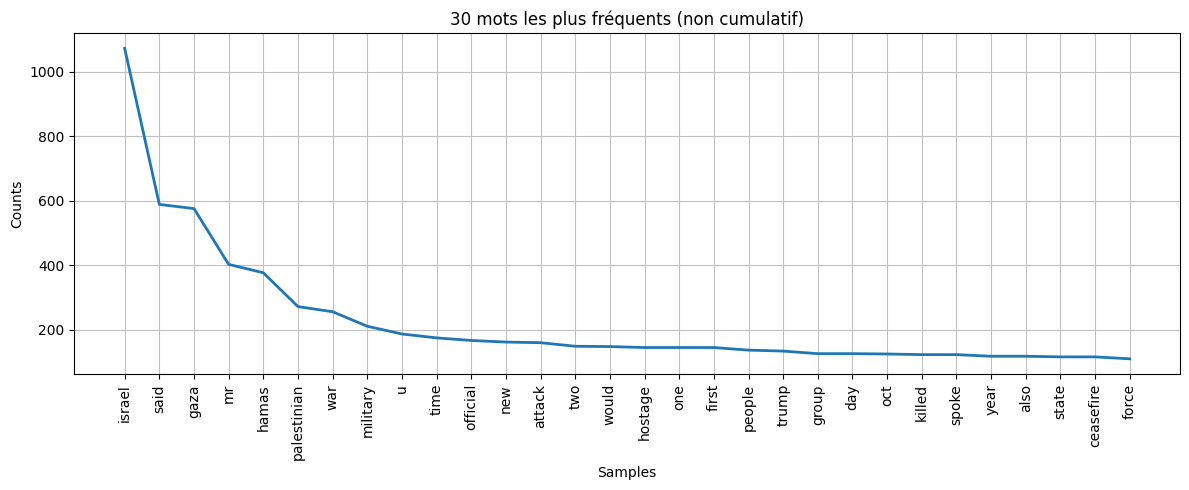

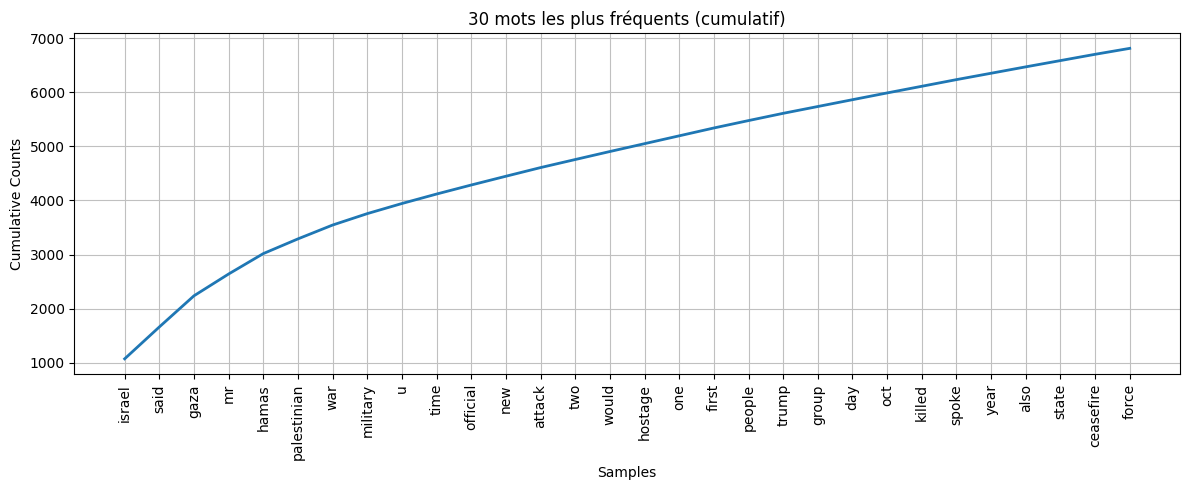

In [298]:
from nltk import FreqDist

# remplacer tous les "israeli" par "israel"
gaza_text_cleaned = ["israel" if token=="israeli" else token for token in gaza_text_cleaned]
# fd2 = FreqDist(text2)  # si text2 est une liste de tokens
fd2 = FreqDist(gaza_text_cleaned) 

#vooir la distribution complete (dictionnaire mots → fréquence)
print(fd2)

#mots les plus frequents
print(fd2.most_common(10))

with open("results/freq_mots_gaza.txt", "w", encoding="utf-8") as f:
    f.write("Distribution des mots \n")
    for mot, freq in fd2.items():
        f.write(f"{mot}: {freq}\n")

#graphe des 30 mots les plus fréquents (non cumulatif)
plt.figure(figsize=(12,5))
fd2.plot(30, cumulative=False)
plt.title("30 mots les plus fréquents (non cumulatif)")
plt.tight_layout()
plt.savefig("results/graphe_30_mots_frequence_gaza.png")  # sauvegarde
plt.show()

#graphe cumulatif
plt.figure(figsize=(12,5))
fd2.plot(30, cumulative=True)
plt.title("30 mots les plus fréquents (cumulatif)")
plt.tight_layout()
plt.savefig("results/graphe_30_mots_frequence_cululatif_gaza.png")  
plt.show()



In [299]:
##hapax mot unique
hap = fd2.hapaxes()  #mots qui apparaissent une seule fois
print("hapax mot unique : ",hap[:5])        #5 premiers hapax


##result
with open("results/hapax_mots_gaza.txt", "w", encoding="utf-8") as f:
    f.write("Hapax (mots qui apparaissent une fois) ===\n")
    for mot in hap:
        f.write(f"{mot}\n")

hapax mot unique :  ['20251205', 'spate', 'suhaib', 'kuwait', 'specialty']


<FreqDist with 4966 samples and 26614 outcomes>
[('ukraine', 500), ('mr', 487), ('said', 402), ('russia', 310), ('russian', 289), ('war', 283), ('ukrainian', 269), ('trump', 199), ('president', 170), ('would', 164), ('official', 155), ('plan', 128), ('european', 127), ('state', 122), ('talk', 120)]


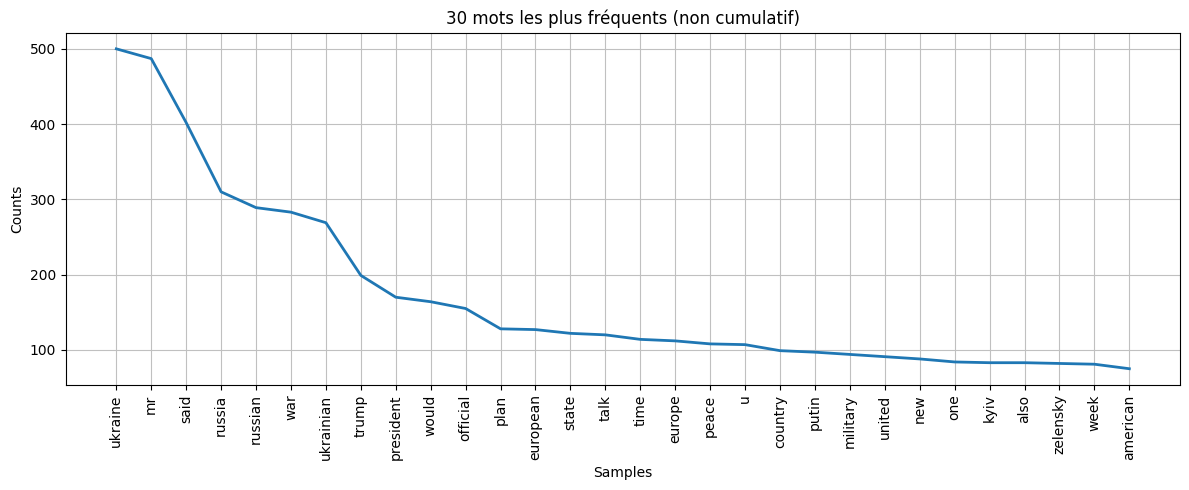

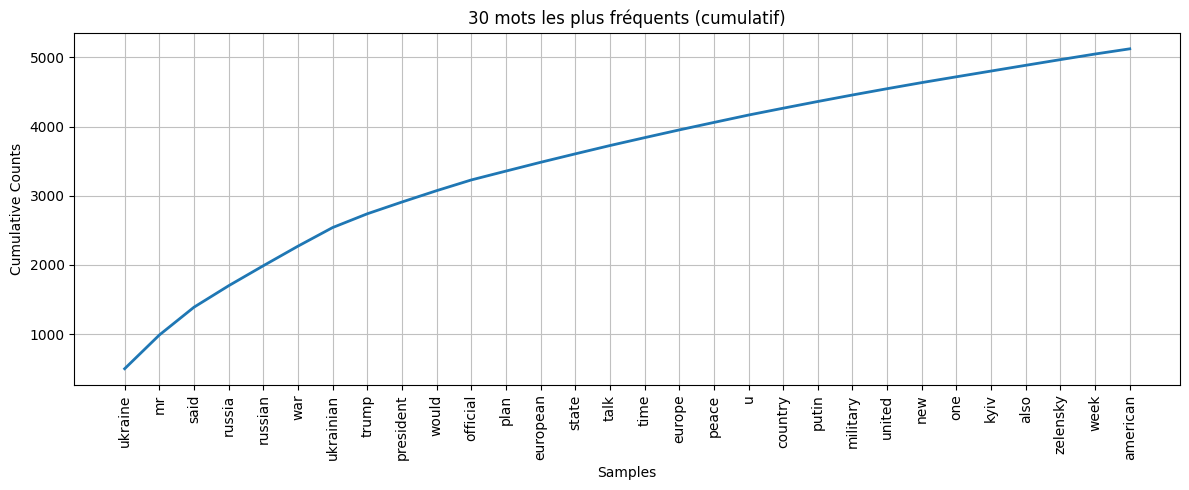

In [300]:
from nltk import FreqDist


fd2_uk = FreqDist(ukraine_text_cleaned)  


print(fd2_uk)

#mots les plus frequents
print(fd2_uk.most_common(15))

#result
with open("results/freq_mots_ukraine.txt", "w", encoding="utf-8") as f:
    f.write("Distribution des mots \n")
    for mot, freq in fd2_uk.items():
        f.write(f"{mot}: {freq}\n")

#graphe des 30 mots les plus fréquents (non cumulatif)
plt.figure(figsize=(12,5))
fd2_uk.plot(30, cumulative=False)
plt.title("30 mots les plus fréquents (non cumulatif)")
plt.tight_layout()
plt.savefig("results/graphe_30_mots_frequence_ukraine.png")  
plt.show()

#graphe cumulatif des 30 mots les plus fréquents
plt.figure(figsize=(12,5))
fd2_uk.plot(30, cumulative=True)
plt.title("30 mots les plus fréquents (cumulatif)")
plt.tight_layout()
plt.savefig("results/graphe_30_mots_frequence_cululatif_ukraine.png")  
plt.show()



In [301]:
##hapax mot unique
hap = fd2_uk.hapaxes()  
print("hapax mot unique : ",hap[:5])        

##result
with open("results/hapax_mots_ukraine.txt", "w", encoding="utf-8") as f:
    f.write("Hapax (mots qui apparaissent une fois) ===\n")
    for mot in hap:
        f.write(f"{mot}\n")

hapax mot unique :  ['20230224', 'overthrow', 'stymied', 'ferocious', 'coast']


In [302]:
#remplacer tous les "israeli" par "israel"
gaza_text_cleaned = ["israel" if token=="israeli" else token for token in gaza_text_cleaned]

print(gaza_text_cleaned[:20])

##avant les plot afficher la version lematizer du vocabulaire quon a utiliser pour le plot
# Liste des mots que tu veux afficher et tracer
# Obtenir les 10 mots les plus fréquents
fd2 = FreqDist(gaza_text_cleaned)
mots_plus_commun = [mot for mot, freq in fd2.most_common(10)]

plot_words_before =mots_plus_commun

plot_words_after = [lemmatizer.lemmatize(w) for w in plot_words_before]

#afficher le vocabulaire lemmatise avant de tracer le plot 
print("Vocabulaire lemmatisé utilisé pour le plot :", plot_words_after)



['metadata', 'source', 'new', 'york', 'time', 'title', 'israel', 'take', 'journalist', 'combat', 'zone', 'gaza', 'blinken', 'visit', 'jordan', 'author', 'ronen', 'bergman', 'reportedfrom', 'northern']
Vocabulaire lemmatisé utilisé pour le plot : ['israel', 'said', 'gaza', 'mr', 'hamas', 'palestinian', 'war', 'military', 'u', 'time']


In [303]:

print(ukraine_text_cleaned[:20])

##avant les plot afficher la version lematizer du vocabulaire quon a utiliser pour le plot
# Liste des mots que tu veux afficher et tracer
# Obtenir les 10 mots les plus fréquents
fd2_uk = FreqDist(ukraine_text_cleaned)
mots_plus_commun = [mot for mot, freq in fd2_uk.most_common(10)]

plot_words_before =mots_plus_commun

plot_words_after = [lemmatizer.lemmatize(w) for w in plot_words_before]

#afficher le vocabulaire lemmatise avant de tracer le plot
print("Vocabulaire lemmatisé utilisé pour le plot :", plot_words_after)



['metadata', 'source', 'new', 'york', 'time', 'title', 'russia', 'war', 'ukraine', 'unfolded', 'month', 'month', 'author', 'matthew', 'mpoke', 'bigg', 'reportedfrom', 'specified', 'publisheddate', '20230224']
Vocabulaire lemmatisé utilisé pour le plot : ['ukraine', 'mr', 'said', 'russia', 'russian', 'war', 'ukrainian', 'trump', 'president', 'would']


Vocabulaire lemmatisé utilisé pour le plot : ['israel', 'said', 'gaza', 'mr', 'hamas', 'palestinian', 'war', 'military', 'u', 'time']


<Figure size 1200x400 with 0 Axes>

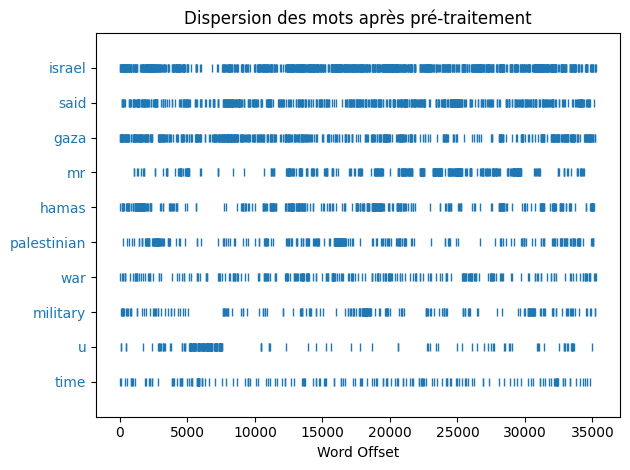

In [304]:
##plot selon les mots les plus frequent 
#tokenisation
tokens = word_tokenize(gaza_text)
gaza_text_nltk = nltk.Text(tokens)  ###transforme une liste de tokens en objet pour l’analyse textuelle

#texte nettoyee (lemmatisé)
gaza_text_nltk2 = nltk.Text(gaza_text_cleaned)

#definir les mots pour le plot avant pre traitement
plot_words_before = [mot for mot, freq in fd2.most_common(10)]

#version lemmatisee pour le plot après pe traitement
plot_words_after = [lemmatizer.lemmatize(w) for w in plot_words_before]

#afficher vocabulaire lemmatisé
print("Vocabulaire lemmatisé utilisé pour le plot :", plot_words_after)

# premier plot : avant pre-traitement (na aucune valeur ajouter a lanalyse)
#plt.figure(figsize=(12,4))
#gaza_text_nltk.dispersion_plot(plot_words_before)
#plt.title("Dispersion des mots avant pré-traitement")
#plt.show()

# deuxieme plot : apres pre-traitement
plt.figure(figsize=(12,4))
gaza_text_nltk2.dispersion_plot(plot_words_after)
plt.title("Dispersion des mots après pré-traitement")
plt.tight_layout()
plt.savefig("results/dispersion_des_mot_frequent_gaza.png")  ##sauvegarde
plt.show()

Vocabulaire lemmatisé utilisé pour le plot : ['ukraine', 'mr', 'said', 'russia', 'russian', 'war', 'ukrainian', 'trump', 'president', 'would']


<Figure size 1200x400 with 0 Axes>

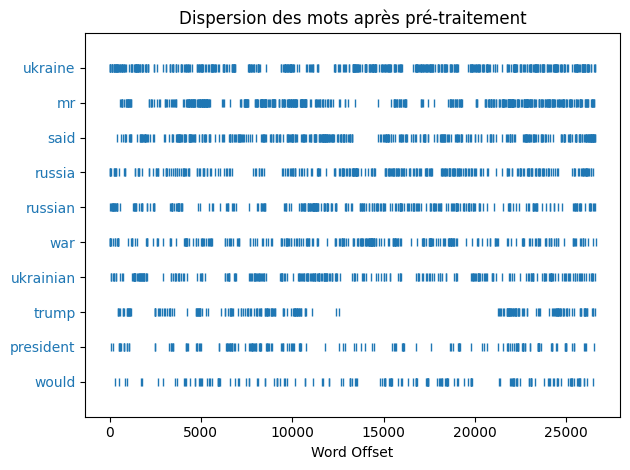

In [305]:
##plot selon les mots les plus frequent 
###tokenisation
tokens = word_tokenize(ukraine_text)
ukraine_text_nltk = nltk.Text(tokens)

#texte nettoye (lemmatise)
ukraine_text_nltk2 = nltk.Text(ukraine_text_cleaned)

#definir les mots pour le plot avant pre-traitement
plot_words_before = [mot for mot, freq in fd2_uk.most_common(10)]

#version lemmatise pour le plot après pre-traitement
plot_words_after = [lemmatizer.lemmatize(w) for w in plot_words_before]

#afficher vocabulaire lemmatise
print("Vocabulaire lemmatisé utilisé pour le plot :", plot_words_after)


# plot après pre-traitement
plt.figure(figsize=(12,4))
ukraine_text_nltk2.dispersion_plot(plot_words_after)
plt.title("Dispersion des mots après pré-traitement")
plt.tight_layout()
plt.savefig("results/dispersion_des_mot_frequent_ukraine.png")  ##sauvegarde
plt.show()

<Figure size 1200x400 with 0 Axes>

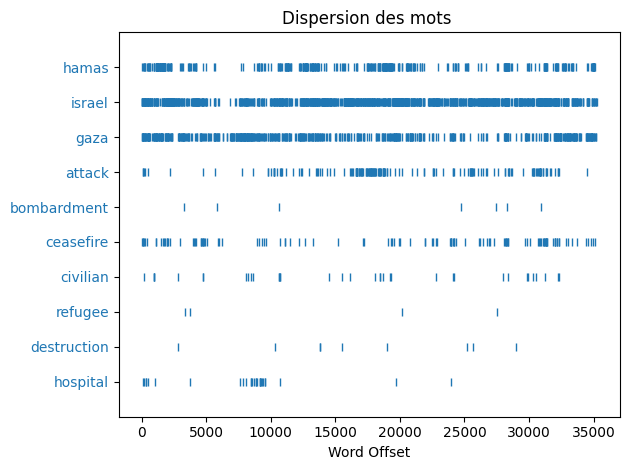

In [306]:
##ici analyse des mot selon ceux voulu
import matplotlib.pyplot as plt


# plot
plt.figure(figsize=(12,4))
gaza_text_nltk2.dispersion_plot([
    "hamas", "israel", "gaza", "attack", "bombardment", 
    "ceasefire", "civilian", "refugee", "destruction", "hospital"
])
plt.title("Dispersion des mots ")
plt.tight_layout()
plt.savefig("results/dispersion_des_mot_choisis_gaza.png")  ##sauvegarde
plt.show()


<Figure size 1200x400 with 0 Axes>

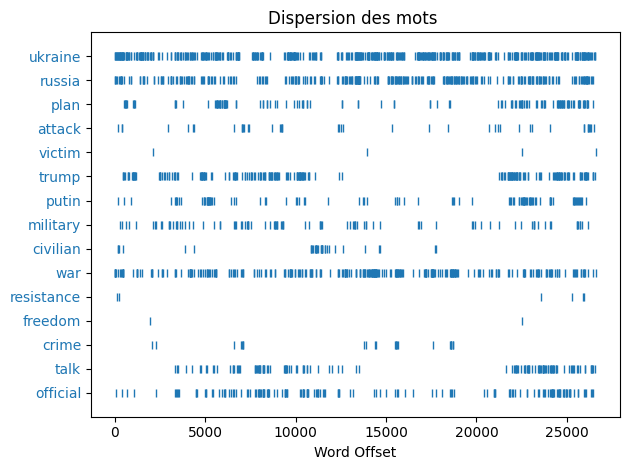

In [307]:
##ici analyse des mot selon ceux voulu
import matplotlib.pyplot as plt


#plot
plt.figure(figsize=(12,4))
ukraine_text_nltk2.dispersion_plot([
    "ukraine", "russia", "plan", "attack", "victim",  "trump", "putin",
    "military", "civilian", "war", "resistance", "freedom","crime","talk","official"
])
plt.title("Dispersion des mots ")
plt.tight_layout()
plt.savefig("results/dispersion_des_mot_choisis_ukraine.png")  ##sauvegarde
plt.show()


In [308]:
##comptez les mots les plus fréquents    

from collections import Counter

counter_gaza = Counter(gaza_text_cleaned)

counter_gaza.most_common(20)

[('israel', 1073),
 ('said', 589),
 ('gaza', 576),
 ('mr', 403),
 ('hamas', 377),
 ('palestinian', 272),
 ('war', 256),
 ('military', 211),
 ('u', 187),
 ('time', 175),
 ('official', 167),
 ('new', 162),
 ('attack', 160),
 ('two', 149),
 ('would', 148),
 ('hostage', 145),
 ('one', 145),
 ('first', 145),
 ('people', 137),
 ('trump', 134)]

In [309]:
##comptez les mots les plus fréquents
##peut etre utiliser un correcteur orthographisque basique (LAB 4 pour rendre israeli en israel)

from collections import Counter

counter_ukraine = Counter(ukraine_text_cleaned)
#counter_ukraine = Counter(mots_ukraine)

counter_ukraine.most_common(20)

[('ukraine', 500),
 ('mr', 487),
 ('said', 402),
 ('russia', 310),
 ('russian', 289),
 ('war', 283),
 ('ukrainian', 269),
 ('trump', 199),
 ('president', 170),
 ('would', 164),
 ('official', 155),
 ('plan', 128),
 ('european', 127),
 ('state', 122),
 ('talk', 120),
 ('time', 114),
 ('europe', 112),
 ('peace', 108),
 ('u', 107),
 ('country', 99)]

Palestine counts: {'palestinian': 272, 'gaza': 576, 'hamas': 377, 'militant': 53}
Israel counts: {'israel': 1073, 'idf': 9, 'soldier': 47, 'civilian': 36}


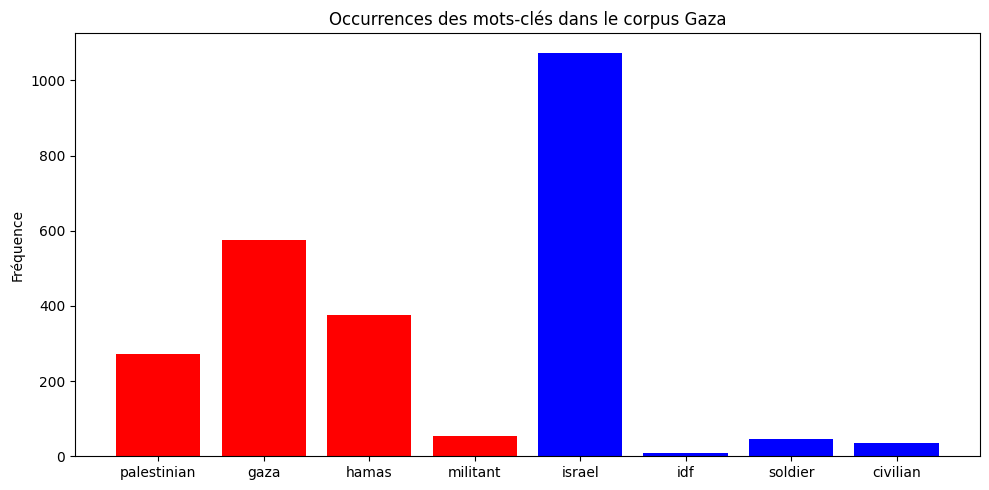

In [310]:
####Comparaison cible

from collections import Counter
import matplotlib.pyplot as plt

#listes de mots-cle
palestine_terms = ["palestinian", "gaza", "hamas", "militant"]
israel_terms = ["israel", "idf", "soldier", "civilian"]

#comptage des occurrences dans le texte nettoye
gaza_counter = Counter(gaza_text_cleaned)

palestine_counts = {word: gaza_counter[word] for word in palestine_terms}
israel_counts = {word: gaza_counter[word] for word in israel_terms}

print("Palestine counts:", palestine_counts)
print("Israel counts:", israel_counts)

##esults
with open("results/comparaison_termes_gaza.txt", "w", encoding="utf-8") as f:
    f.write("Occurrences des mots cles\n")
    f.write("Palestine counts:\n")
    for word, count in palestine_counts.items():
        f.write(f"{word}: {count}\n")
    f.write("\nIsrael counts:\n")
    for word, count in israel_counts.items():
        f.write(f"{word}: {count}\n")

#graphe
terms = palestine_terms + israel_terms
counts = [palestine_counts[t] for t in palestine_terms] + [israel_counts[t] for t in israel_terms]

plt.figure(figsize=(10,5))
plt.bar(terms, counts, color=["red"]*len(palestine_terms) + ["blue"]*len(israel_terms))
plt.title("Occurrences des mots-clés dans le corpus Gaza")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.savefig("results/comparaison_termes_gaza.png")
plt.show()


Ukraine counts: {'civilian': 33, 'victim': 4, 'trump': 199, 'ukraine': 500}
Russia counts: {'putin': 97, 'talk': 120, 'soldier': 39, 'militant': 0, 'russia': 310}


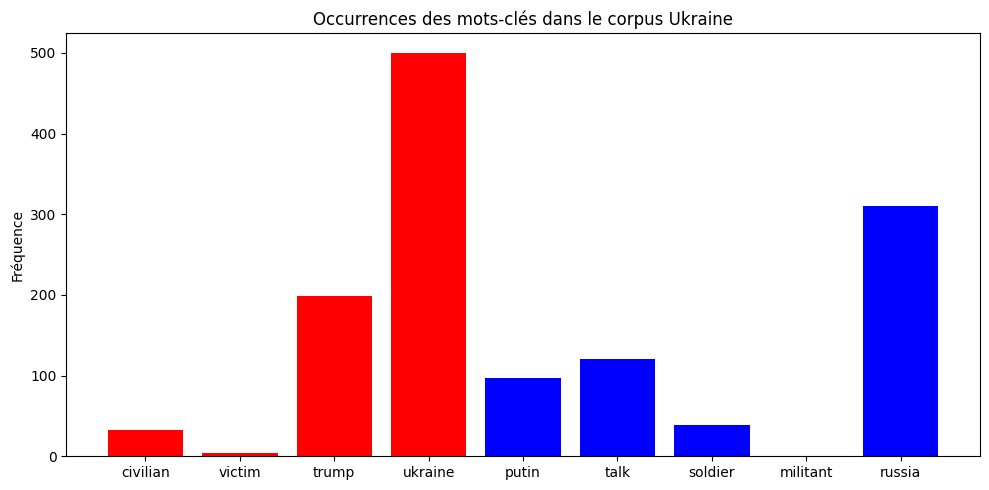

In [311]:
####Comparaison ciblee

from collections import Counter
import matplotlib.pyplot as plt

#listes de mots cles
ukraine_terms = ["civilian", "victim", "trump","ukraine"]
russia_terms = ["putin", "talk", "soldier","militant","russia"]

#compter les occurrences dans le texte nettoye
ukraine_counter = Counter(ukraine_text_cleaned)

ukraine_counts = {word: ukraine_counter[word] for word in ukraine_terms}
russia_counts = {word: ukraine_counter[word] for word in russia_terms}

print("Ukraine counts:", ukraine_counts)
print("Russia counts:", russia_counts)


##esults
with open("results/comparaison_termes_ukraine.txt", "w", encoding="utf-8") as f:
    f.write("Occurrences des mots cles\n")
    f.write("Ukraine counts:\n")
    for word, count in ukraine_counts.items():
        f.write(f"{word}: {count}\n")
    f.write("\nRussia counts:\n")
    for word, count in russia_counts.items():
        f.write(f"{word}: {count}\n")

#graphe
terms = ukraine_terms + russia_terms
counts = [ukraine_counts[t] for t in ukraine_terms] + [russia_counts[t] for t in russia_terms]

plt.figure(figsize=(10,5))
plt.bar(terms, counts, color=["red"]*len(ukraine_terms) + ["blue"]*len(russia_terms))
plt.title("Occurrences des mots-clés dans le corpus Ukraine")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.savefig("results/comparaison_cible_ukraine.png")
plt.show()


In [312]:
##analyse par contexte

print("concordance pour 'hamas' : ")
gaza_text_nltk.concordance("hamas")
print("similarite pour 'hamas' : ")
gaza_text_nltk.similar("hamas")


##result
import io
import sys ##doit utiliser les deux bibliotheque car concordance et similar n'enregistre aucune information et l'affiche directement sur console

buffer = io.StringIO()
sys_stdout = sys.stdout
sys.stdout = buffer  
print("concordance pour 'hamas' : ")
gaza_text_nltk.concordance("hamas")
print("similarite pour 'hamas' : ")
gaza_text_nltk.similar("hamas")

sys.stdout = sys_stdout
contexte_text = buffer.getvalue()

#sauvegarde
with open("results/analyse_concordance_similarite_hamas_gaza.txt", "w", encoding="utf-8") as f:
    f.write(contexte_text)


concordance pour 'hamas' : 
Displaying 25 of 376 matches:
e as he described the battle against Hamas as “ catching a mouse. ” In Amman , 
ke on Gaza on Wednesday after saying Hamas had attacked its soldiers , the late
southern Gaza , in retaliation for a Hamas attack in nearby Rafah that it said 
li military has said it has targeted Hamas , but Palestinian health officials h
ted the war in Gaza . On Wednesday , Hamas and Islamic Jihad , the second-large
 long-term cease-fire . In Rafah , a Hamas militant opened fire on an Israeli a
e as he described the battle against Hamas as “ catching a mouse. ” In Amman , 
ese were the signs of battle between Hamas , the Palestinian militia that contr
ich had for eight days tried to oust Hamas from power . Israeli military leader
invasive force that aims to vanquish Hamas , which led a brazen raid on Israel 
eaching the outskirts of Gaza City , Hamas ’ s stronghold , and establishing co
h authority , which is controlled by Hamas . Palestinian resid

In [313]:
##common contexte
window = 5
contexts = []
keywords = ["hamas", "israel", "attack"]

for i, word in enumerate(gaza_text_cleaned):
    if word in keywords:
        start = max(i-window, 0)
        end = min(i+window+1, len(gaza_text_cleaned))
        contexts.append(gaza_text_cleaned[start:end])

#affichage
for c in contexts[:10]:
    print(" ".join(c))

#sauvegarde
with open("results/analyse_commun_context_gaza.txt", "w", encoding="utf-8") as f:
    f.write("Contextes 'hamas' 'israel' 'attack'\n")
    for c in contexts:
        f.write(" ".join(c) + "\n")

source new york time title israel take journalist combat zone gaza
20250527 conflict israelhamas war article israel colonel projected confidence described battle
colonel projected confidence described battle hamas catching mouse amman jordan egyptian
ceasefire journalist get glimpse inside israel invasion battle go israel protester
inside israel invasion battle go israel protester demand government bring hostage
gaza thousand across u protest israel retaliation gaza israel attack gaza
u protest israel retaliation gaza israel attack gaza reopening old wound
protest israel retaliation gaza israel attack gaza reopening old wound beirut
new york time title deadly attack gaza test ceasefire body another
9 conflict israelhamas war article israel military launched deadly strike gaza


In [314]:
##analyse par contexte
print("Concordance pour 'ukraine'")
ukraine_text_nltk.concordance("ukraine")
print("\nMots similaires à 'ukraine' ===")
ukraine_text_nltk.similar("ukraine")

##esult
#creer un buffer pour capturer la sortie
buffer = io.StringIO()
sys_stdout = sys.stdout
sys.stdout = buffer  # rediriger stdout vers buffer

print("Concordance pour 'ukraine'")
ukraine_text_nltk.concordance("ukraine")
print("\nMots similaires à 'ukraine' ===")
ukraine_text_nltk.similar("ukraine")
sys.stdout = sys_stdout
contexte_text = buffer.getvalue()

#sauvegarde
with open("results/analyse_concordance_similarite_ukraine.txt", "w", encoding="utf-8") as f:
    f.write(contexte_text)


Concordance pour 'ukraine'
Displaying 25 of 495 matches:
Times Title : How Russia ’ s war in Ukraine has unfolded , month by month Autho
= ARTICLE === How Russia ’ s war in Ukraine has unfolded , month by month . A t
f Russia ’ s full-scale invasion of Ukraine , which began one year ago . Russia
 began their full-scale invasion of Ukraine on Feb. 24 , 2022 . Since then , We
regional capital , aiming to secure Ukraine ’ s coast . Moscow also sought to f
la , which it illegally seized from Ukraine in 2014 , and Russian-backed breaka
republics that emerged that year in Ukraine ’ s eastern Donetsk and Luhansk reg
. Far more civilians were killed in Ukraine in March than in any other month of
 Snake Island in the Black Sea , as Ukraine reclaimed a sliver of land off Odes
 ’ s Black Sea fleet , the Moskva , Ukraine further undermined Moscow ’ s aura 
r weeks of bloody fighting . August Ukraine launched a counteroffensive in the 
 . September In a rapid offensive , Ukraine retook much of the 

In [315]:
##common contexte
window = 5
contexts = []
keywords = ["ukraine", "russia", "war", "invasion", "soldiers", "civilians"]

for i, word in enumerate(ukraine_text_cleaned):
    if word in keywords:
        start = max(i-window, 0)
        end = min(i+window+1, len(ukraine_text_cleaned))
        contexts.append(ukraine_text_cleaned[start:end])

#affichage
for c in contexts[:10]:
    print(" ".join(c))

#sauvegarde
with open("results/analyse_commun_context_ukraine.txt", "w", encoding="utf-8") as f:
    f.write("Contextes 'ukraine', 'russia', 'war', 'invasion', 'soldiers', 'civilians'\n")
    for c in contexts:
        f.write(" ".join(c) + "\n")

source new york time title russia war ukraine unfolded month month
new york time title russia war ukraine unfolded month month author
york time title russia war ukraine unfolded month month author matthew
20230224 updateddate specified section russiaukraine war timeline conflict russiaukraine war article
russiaukraine war timeline conflict russiaukraine war article russia war ukraine unfolded
timeline conflict russiaukraine war article russia war ukraine unfolded month month
conflict russiaukraine war article russia war ukraine unfolded month month timeline
russiaukraine war article russia war ukraine unfolded month month timeline russia
ukraine unfolded month month timeline russia fullscale invasion ukraine began one
month month timeline russia fullscale invasion ukraine began one year ago


In [316]:
##analyse par contexte

gaza_text_nltk.concordance("killed")
gaza_text_nltk.similar("killed")


Displaying 25 of 123 matches:
 ago . The Israeli military said it killed a militant in Khan Younis , in sout
an Younis , said the Israeli strike killed at least six people , including a m
 have said many civilians have been killed in the strikes , including children
azen raid on Israel last month that killed roughly 1,400 people . Eight days l
n Israeli bombing campaign that has killed more than 9,000 Gazans , according 
 such protection ; dozens have been killed in airstrikes since the start of th
and thousands of fighters have been killed , and the group ’ s arsenal has bee
has quickly replaced the commanders killed in the war , said Brig . Gen. Erez 
nian militia backed by Israel , was killed in a clash in eastern Rafah . Thoug
r the remains of those who had been killed . Yet that process has taken time :
Israeli security forces on Thursday killed two militants in the West Bank afte
the West Bank said the two men were killed and identified them as Al-Muntasir 
ight , he said the thr

In [317]:
##analyse par contexte

ukraine_text_nltk.concordance("killed")
ukraine_text_nltk.similar("killed")


Displaying 21 of 21 matches:
ds of thousands of people have been killed , millions of Ukrainians have fled 
as Donbas . Far more civilians were killed in Ukraine in March than in any oth
n in the eastern city of Kramatorsk killed at least 50 civilians . The attack 
v , after weeks of bombardment that killed thousands of civilians . The fighti
ck ; Ukraine said hundreds had been killed or wounded . February Russian force
in the war were approaching 200,000 killed or wounded . Ukraine had 100,000 ki
ed or wounded . Ukraine had 100,000 killed or wounded in action , along with a
ing the legacy of Ukrainian writers killed under Stalin . Many Ukrainians have
 that the boat strikes , which have killed more than 80 people since early Sep
 have wanted ” a second strike that killed survivors , before reiterating that
itself . The U.S. boat strikes have killed more than 80 people since early Sep
litschko , said two people had been killed and at least 37 injured . A third p
ast 37 injured . A thir

In [318]:
##analyse par contexte

ukraine_text_nltk.concordance("victim")
ukraine_text_nltk.similar("victim")


Displaying 2 of 2 matches:
rassing for the Kremlin because the victim , Russell Bonner Bentley III , 64 ,
ouldn ’ t issue an ultimatum to the victim — you need to put pressure on the a
butter


In [319]:
##analyse par contexte

gaza_text_nltk.concordance("victim")
gaza_text_nltk.similar("victim")



Displaying 4 of 4 matches:
or what . “ I was not going to be a victim , ” she said . When she was taken f
tem , portraying Mr. Netanyahu as a victim and seeming to hint at potential re
tem , portraying Mr. Netanyahu as a victim and appearing to hint at the prospe
n said . In portraying himself as a victim of an out-of-control law-enforcemen
state source in war test page hospital return group cluster flood
strip way stretch long landscape moment photograph position brief


In [320]:
###frequence du mot hamas et son pourcentage d'occupation

print("frequence du mot 'hamas' :",gaza_text_cleaned.count("hamas"))#frequence d’un mot precis
#pourcentage d’occupation
def percentage(text, word):
    return 100 * text.count(word) / len(text)

print("poucentage d'occupation du mot 'hamas' : ",percentage(gaza_text_cleaned, "hamas"))


frequence du mot 'hamas' : 377
poucentage d'occupation du mot 'hamas' :  1.0687455705173636


In [321]:

print("frequence du mot 'resistance' :",gaza_text_cleaned.count("resistance"))#Fréquence d’un mot spécifique
print("poucentage d'occupation du mot 'resistance' : ",percentage(gaza_text_cleaned, "heroic resistance"))

frequence du mot 'resistance' : 6
poucentage d'occupation du mot 'resistance' :  0.0


In [322]:
###frequence du mot ceasefire et son pourcentage d'occupation

print("frequence du mot 'ceasefire' :",gaza_text_cleaned.count("ceasefire"))#Fréquence d’un mot spécifique
print("poucentage d'occupation du mot 'ceasefire' : ",percentage(gaza_text_cleaned, "ceasefire"))



#total de mots
total_words = len(gaza_text_cleaned)

#toutes les fréquences
freq = Counter(gaza_text_cleaned)

terms = [
    "hamas", "israel","trump", "gaza", "attack", "bombardment",
    "ceasefire", "civilians", "refugee", "destruction", "hospital"
]

for term in terms:
    f = freq[term]
    p = (f / total_words) * 100 if total_words > 0 else 0

    print(f"Mot : {term}")
    print(f"  Fréquence   : {f}")
    print(f"  Pourcentage : {p:.4f} %\n")


##result
with open("results/pourcentage_occupation_terms_gaza.txt", "w", encoding="utf-8") as f:
    f.write(f"Fréquence et pourcentage d'occupation des mots dans Gaza (total {total_words} mots)\n\n")
    
    for term in terms:
        f_term = freq[term]
        p_term = (f_term / total_words) * 100 if total_words > 0 else 0
        f.write(f"Mot : {term}\n")
        f.write(f"  Fréquence   : {f_term}\n")
        f.write(f"  Pourcentage : {p_term:.4f} %\n\n")


frequence du mot 'ceasefire' : 116
poucentage d'occupation du mot 'ceasefire' :  0.32884479092841956
Mot : hamas
  Fréquence   : 377
  Pourcentage : 1.0687 %

Mot : israel
  Fréquence   : 1073
  Pourcentage : 3.0418 %

Mot : trump
  Fréquence   : 134
  Pourcentage : 0.3799 %

Mot : gaza
  Fréquence   : 576
  Pourcentage : 1.6329 %

Mot : attack
  Fréquence   : 160
  Pourcentage : 0.4536 %

Mot : bombardment
  Fréquence   : 7
  Pourcentage : 0.0198 %

Mot : ceasefire
  Fréquence   : 116
  Pourcentage : 0.3288 %

Mot : civilians
  Fréquence   : 0
  Pourcentage : 0.0000 %

Mot : refugee
  Fréquence   : 4
  Pourcentage : 0.0113 %

Mot : destruction
  Fréquence   : 9
  Pourcentage : 0.0255 %

Mot : hospital
  Fréquence   : 28
  Pourcentage : 0.0794 %



In [323]:
###frequence du mot ceasefire et son pourcentage d'occupation  

print("frequence du mot 'ceasefire' :",ukraine_text_cleaned.count("ceasefire"))#Fréquence d’un mot spécifique
#Pourcentage d’occupation d’un token
def percentage(text, word):
    return 100 * text.count(word) / len(text)

print("poucentage d'occupation du mot 'ceasefire' : ",percentage(ukraine_text_cleaned, "ceasefire"))



#total de mots
total_words = len(ukraine_text_cleaned)

#toutes les fréquences
freq = Counter(ukraine_text_cleaned)

terms = [
    "ukraine", "russia", "sanction", "attack", "victim", 
    "military", "civilian", "war", "crime", "freedom","putin","trump"
]

for term in terms:
    f = freq[term]
    p = (f / total_words) * 100 if total_words > 0 else 0

    print(f"Mot : {term}")
    print(f"  Fréquence   : {f}")
    print(f"  Pourcentage : {p:.4f} %\n")


##result
with open("results/pourcentage_occupation_terms_ukraine.txt", "w", encoding="utf-8") as f:
    f.write(f"Fréquence et pourcentage d'occupation des mots dans ukraine (total {total_words} mots)\n\n")
    
    for term in terms:
        f_term = freq[term]
        p_term = (f_term / total_words) * 100 if total_words > 0 else 0
        f.write(f"Mot : {term}\n")
        f.write(f"  Fréquence   : {f_term}\n")
        f.write(f"  Pourcentage : {p_term:.4f} %\n\n")


frequence du mot 'ceasefire' : 4
poucentage d'occupation du mot 'ceasefire' :  0.01502968362515969
Mot : ukraine
  Fréquence   : 500
  Pourcentage : 1.8787 %

Mot : russia
  Fréquence   : 310
  Pourcentage : 1.1648 %

Mot : sanction
  Fréquence   : 3
  Pourcentage : 0.0113 %

Mot : attack
  Fréquence   : 42
  Pourcentage : 0.1578 %

Mot : victim
  Fréquence   : 4
  Pourcentage : 0.0150 %

Mot : military
  Fréquence   : 94
  Pourcentage : 0.3532 %

Mot : civilian
  Fréquence   : 33
  Pourcentage : 0.1240 %

Mot : war
  Fréquence   : 283
  Pourcentage : 1.0634 %

Mot : crime
  Fréquence   : 23
  Pourcentage : 0.0864 %

Mot : freedom
  Fréquence   : 2
  Pourcentage : 0.0075 %

Mot : putin
  Fréquence   : 97
  Pourcentage : 0.3645 %

Mot : trump
  Fréquence   : 199
  Pourcentage : 0.7477 %



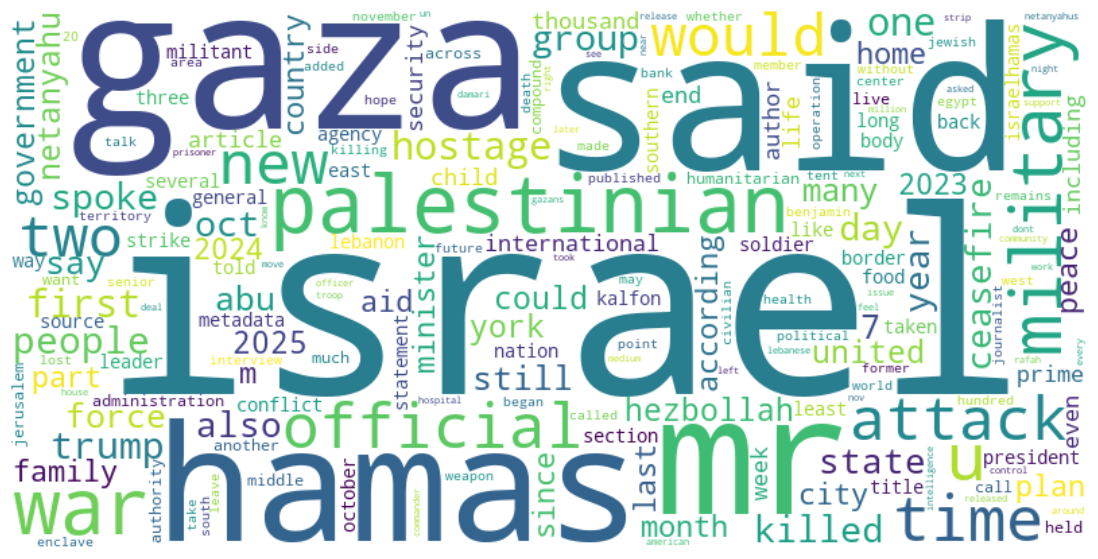

In [324]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#generer le nuage de mots à partir de fd2 (FreqDist)
wordcloud = WordCloud(width=800, height=400, background_color="white")\
            .generate_from_frequencies(fd2)

#afficher le nuage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("results/wordcloud_gaza.png")

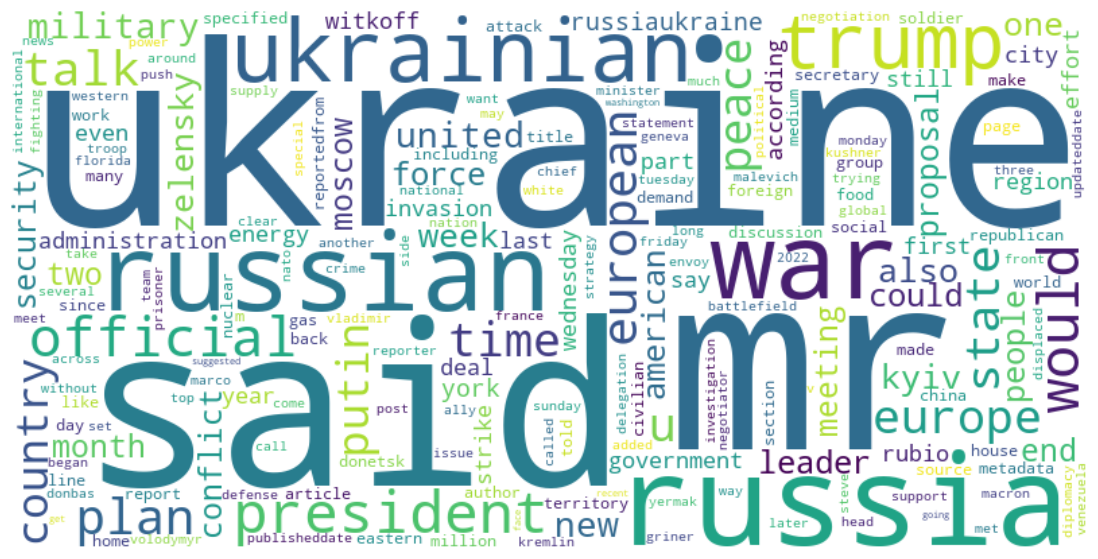

In [325]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white")\
            .generate_from_frequencies(fd2_uk)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("results/wordcloud_ukraine.png")


In [326]:
###extraction des metadonne

for art in corpus:
    auteur = art["metadata"].get("Title")  
    print(auteur)


##esults
with open("results/titres_articles_gaza.txt", "w", encoding="utf-8") as f:
    for art in corpus:
        titre = art["metadata"].get("Title", "Unknown")
        f.write(titre + "\n")

Israel Takes Journalists to Combat Zone in Gaza While Blinken Visits Jordan
Deadly Attacks in Gaza Test Cease-Fire as Body of Another Captive Is Returned
Israel Takes Journalists to Combat Zone in Gaza While Blinken Visits Jordan
A Weakened Hamas Still Dominates Gaza, Building Day by Day
Israel Says a Gaza Border Will Reopen, but Only for Palestinians to Leave
Israeli Forces Kill Two Palestinians After They Appear to Surrender, Video Shows
U.S. Plans Compounds to House Palestinians in Israeli-Held Half of Gaza
In Israel, an Unfamiliar Word Is Heard: Peace
U.S. Diplomats Will Work With Troops to Maintain Gaza Cease-Fire, Rubio Says
We’ve interviewed more than 700 people in Gaza over the past two years. Their stories stayed with us.
As Israel Pounds Gaza City, an Overwhelming Exodus
Gazans Are Dying of Starvation
Freed From Hamas, but Not Captivity
In Israel, Two-Year Anniversary of Oct. 7 Attack Is Quiet but Inescapable
Trump Calls on Israel to Stop Bombing Gaza After Hamas Agrees to Pa

In [327]:
###extraction des metadonne

for art in corpus_ukraine:
    auteur = art["metadata"].get("Title")  
    print(auteur)


##esults
with open("results/titres_articles_ukraine.txt", "w", encoding="utf-8") as f:
    for art in corpus:
        titre = art["metadata"].get("Title", "Unknown")
        f.write(titre + "\n")

How Russia’s war in Ukraine has unfolded, month by month
As Trump Pushes to End Ukraine War, Europe Toils to Have a Say
Another Front in the War in Ukraine: Who Gets to Claim a Famed Artist?
4 Russian Soldiers Sentenced to Prison for Killing Texan Who Fought for Moscow
Superpower Competition: The Missing Chapter in Trump’s Security Strategy
Battlefield Picture Worsening for Ukraine as Trump Pushes Peace Plan
Macron Urges Xi to Help End War in Ukraine
His Deadline for a Peace Deal Blown, Trump Faces Choices on Russia-Ukraine Talks
Stakes High, Europe Races to Save Its Financing Plan for Ukraine
Rubio Says ‘Much Work to Do’ After Talks With Ukrainian Delegation
Zelensky Rejects Ceding Land as U.S. Seeks ‘Compromise’ on Russian Demand
Top Trump Aides to Meet With Ukrainians in Florida on Sunday
The Ukrainians Stuck in Russia’s New Gulag
Russia Bombards Ukraine for Nearly 10 Hours in a Deadly Assault
Lured by Jobs, They Ended Up ‘Going to War’ for Russia
The Territorial Sticking Point Betw

In [328]:
####Analyse des cooccurrences 

import nltk
from collections import Counter
from nltk.tokenize import sent_tokenize


##extraction adjectifs verbes et noms associes a un acteur 
def cooccurrences_by_pos(tokens, keywords):
    text = " ".join(tokens)
    sentences = sent_tokenize(text)

    adj_cooc = Counter()
    verb_cooc = Counter()
    noun_cooc = Counter()

    excluded = set(keywords)

    #adjectifs a exclure exclure (napporte rien a lanalyse)
    stop_adj = {"new", "last", "many", "least", "first", "several"}

    for s in sentences:
        s_lower = s.lower()

        #garder juste les phrases contenant l'acteur
        if any(k in s_lower for k in keywords):
            tagged = nltk.pos_tag(s.split())

            for w, tag in tagged:
                w = w.lower()

                if w in excluded:
                    continue

                #adj
                if tag.startswith("JJ") and w not in stop_adj:
                    adj_cooc[w] += 1

                #verbe
                elif tag.startswith("VB"):
                    verb_cooc[w] += 1

                #noms
                elif tag.startswith("NN"):
                    noun_cooc[w] += 1

    return adj_cooc, verb_cooc, noun_cooc




palestine_terms = ["palestinian", "gaza", "hamas"]
israel_terms = ["israel", "idf", "soldier"]


adj_pal, verb_pal, noun_pal = cooccurrences_by_pos(
    gaza_text_nltk, palestine_terms
)

adj_isr, verb_isr, noun_isr = cooccurrences_by_pos(
    gaza_text_nltk, israel_terms
)


print("Palestiniens / Gaza ")
print("Adjectifs :", adj_pal.most_common(10))
print("Verbes    :", verb_pal.most_common(10))
print("Noms      :", noun_pal.most_common(10))

print("\n Israël / IDF ")
print("Adjectifs :", adj_isr.most_common(10))
print("Verbes    :", verb_isr.most_common(10))
print("Noms      :", noun_isr.most_common(10))


Palestiniens / Gaza 
Adjectifs : [('israeli', 77), ('military', 73), ('more', 48), ('other', 43), ('”', 36), ('“', 34), ('israel-hamas', 33), ('southern', 29), ('humanitarian', 26), ('international', 26)]
Verbes    : [('said', 199), ('has', 159), ('was', 136), ('s', 132), ('is', 110), ('had', 109), ('were', 107), ('have', 106), ('be', 93), ('been', 77)]
Noms      : [('israel', 334), ('’', 223), ('war', 161), ('israeli', 160), ('===', 159), ('palestinians', 128), ('”', 116), ('mr.', 99), ('oct.', 90), ('officials', 75)]

 Israël / IDF 
Adjectifs : [('israeli', 147), ('military', 115), ('palestinian', 74), ('more', 60), ('s', 52), ('”', 48), ('other', 38), ('israel-hamas', 33), ('“', 31), ('southern', 27)]
Verbes    : [('said', 190), ('has', 168), ('s', 164), ('was', 147), ('is', 129), ('have', 108), ('had', 97), ('be', 92), ('were', 82), ('are', 64)]
Noms      : [('gaza', 333), ('’', 308), ('israeli', 295), ('hamas', 238), ('===', 185), ('war', 160), ('mr.', 137), ('”', 107), ('palestin

In [329]:
##result
###pour enregistrer dans result
buffer = io.StringIO()
sys_stdout = sys.stdout
sys.stdout = buffer  
print("Palestiniens / Gaza ")
print("Adjectifs :", adj_pal.most_common(10))
print("Verbes    :", verb_pal.most_common(10))
print("Noms      :", noun_pal.most_common(10))

print("\n Israël / IDF ")
print("Adjectifs :", adj_isr.most_common(10))
print("Verbes    :", verb_isr.most_common(10))
print("Noms      :", noun_isr.most_common(10))

sys.stdout = sys_stdout
console_output = buffer.getvalue()
with open("results/cooccurrences_gaza.txt", "w", encoding="utf-8") as f:
    f.write(console_output)

In [330]:
ukraine_terms = ["ukrainian", "kyev", "heroic resistance"]
russia_terms = ["russian", "moscow", "soldier"]


adj_pal, verb_pal, noun_pal = cooccurrences_by_pos(
    ukraine_text_nltk, ukraine_terms
)

adj_isr, verb_isr, noun_isr = cooccurrences_by_pos(
    ukraine_text_nltk, russia_terms
)


print("Ukraine ")
print("Adjectifs :", adj_pal.most_common(10))
print("Verbes    :", verb_pal.most_common(10))
print("Noms      :", noun_pal.most_common(10))

print("\nRussia")
print("Adjectifs :", adj_isr.most_common(10))
print("Verbes    :", verb_isr.most_common(10))
print("Noms      :", noun_isr.most_common(10))


Ukraine 
Adjectifs : [('russian', 54), ('s', 18), ('russia-ukraine', 16), ('”', 15), ('military', 14), ('other', 14), ('more', 12), ('european', 11), ('*', 10), ('social', 9)]
Verbes    : [('said', 62), ('was', 40), ('s', 35), ('had', 33), ('is', 33), ('be', 33), ('have', 31), ('has', 31), ('been', 20), ('were', 20)]
Noms      : [('’', 90), ('ukraine', 69), ('mr.', 67), ('officials', 57), ('russia', 53), ('war', 51), ('ukrainians', 47), ('*', 40), ('===', 35), ('”', 34)]

Russia
Adjectifs : [('ukrainian', 64), ('military', 20), ('russia-ukraine', 20), ('eastern', 18), ('european', 14), ('s', 13), ('”', 13), ('more', 11), ('most', 10), ('other', 10)]
Verbes    : [('said', 73), ('has', 54), ('was', 49), ('had', 48), ('s', 45), ('is', 41), ('are', 38), ('been', 34), ('have', 30), ('be', 26)]
Noms      : [('ukraine', 126), ('’', 117), ('war', 77), ('mr.', 76), ('russia', 61), ('forces', 46), ('===', 42), ('s', 41), ('trump', 39), ('”', 37)]


In [331]:
##result
###pour enregistrer dans result
buffer = io.StringIO()
sys_stdout = sys.stdout
sys.stdout = buffer  
print("Ukraine ")
print("Adjectifs :", adj_pal.most_common(10))
print("Verbes    :", verb_pal.most_common(10))
print("Noms      :", noun_pal.most_common(10))

print("\n Russia ")
print("Adjectifs :", adj_isr.most_common(10))
print("Verbes    :", verb_isr.most_common(10))
print("Noms      :", noun_isr.most_common(10))

sys.stdout = sys_stdout
console_output = buffer.getvalue()
with open("results/cooccurrences_ukraine.txt", "w", encoding="utf-8") as f:
    f.write(console_output)

ANALYSE SEMANTIQUE

In [332]:
mot = "attack"

#concordances
def concordance_window(tokens, keyword, window=5):
    results = []
    keyword = keyword.lower()

    for i, w in enumerate(tokens):
        if w.lower() == keyword:
            left = tokens[max(0, i-window):i]
            right = tokens[i+1:i+1+window]
            results.append(" ".join(left + [w] + right))

    return results

gaza_concordance = concordance_window(gaza_text_nltk, mot)


print("Gaza :")
for c in gaza_concordance[:10]:   #limiter affichage a 10
    print(c)


#results
with open("results/concordance_attack_gaza.txt", "w", encoding="utf-8") as f:
    for c in gaza_concordance:
        f.write(c + "\n")

Gaza :
in retaliation for a Hamas attack in nearby Rafah that it
taken hostage during the Hamas-led attack on Oct. 7 , 2023
was ignited by the Hamas-led attack on Israel on Oct. 7
Oct. 7 , 2023 , attack on Israel . Negotiators from
was ignited by a Hamas-led attack on southern Israel on Oct.
off by the deadly Hamas-led attack on Israel on Oct. 7
of being alone during the attack , Gali Berman dashed over
for those killed in the attack . Since her return ,
hostages taken in the Hamas attack , dozens were released in
Two-Year Anniversary of Oct. 7 Attack Is Quiet but Inescapable Authors


In [333]:

# Concordances
ukraine_concordance = concordance_window(ukraine_text_nltk, "attack")


print("Ukraine :")
for c in ukraine_concordance[:10]:   
    print(c)

#sauvegarde dans un fichier 
with open("results/concordance_attack_ukraine.txt", "w", encoding="utf-8") as f:
    for c in ukraine_concordance[:10]:
        f.write(c + "\n")


Ukraine :
least 50 civilians . The attack came at the start of
of 89 soldiers in the attack ; Ukraine said hundreds had
military if China were to attack Taiwan . But in remarks
the survivors of an initial attack on a vessel that administration
said that during one such attack , a follow-up strike was
who had initially survived an attack in early September . “
report was accurate , the attack “ rises to the level
that in the first boat attack , on Sept. 2 ,
denied that account of the attack . The defense secretary did
, much less an actual attack on Venezuela , would violate


In [334]:

#concordances
gaza_concordance = concordance_window(gaza_text_nltk, "trump")


print("gaza :")
for c in gaza_concordance[:10]:  
    print(c)


#results
with open("results/concordance_trump_gaza.txt", "w", encoding="utf-8") as f:
    for c in gaza_concordance[:10]:
        f.write(c + "\n")


gaza :
a formidable obstacle to the Trump administration ’ s plan to
by the war . The Trump administration has refused to consider
it still has . The Trump plan for Gaza is predicated
weapons as long as President Trump offers guarantees that Israel will
and Hamas-controlled zones . The Trump administration is pushing for the
Aryeh Lightstone , a senior Trump administration official who is leading
is an outgrowth of the Trump administration ’ s peace plan
an unlikely fit for the Trump administration . As recently as
as last May , President Trump mocked the United States ’
. Mr. Lightstone , the Trump official leading the effort ,


In [335]:

#concordances
ukraine_concordance = concordance_window(ukraine_text_nltk, "trump")


print("Ukraine :")
for c in ukraine_concordance[:10]:  
    print(c)

#sauvegarde
with open("results/concordance_trump_gaza.txt", "w", encoding="utf-8") as f:
    for c in ukraine_concordance[:10]:
        f.write(c + "\n")

Ukraine :
York Times Title : As Trump Pushes to End Ukraine War
War === ARTICLE === As Trump Pushes to End Ukraine War
relevance , courtesy of President Trump . Would the Americans really
to lash out at Mr. Trump ’ s 28-point peace plan
vivendi for dealing with the Trump administration. ” He said that
was to “ slowly steer Trump back to a more favorable
of how to handle Mr. Trump . Heaping praise on the
scrambling for influence as Mr. Trump and his team make pronouncements
. In April , Mr. Trump declared “ Liberation Day ,
onerous than the ones Mr. Trump had threatened . Two months


In [336]:

gaza_concordance = concordance_window(gaza_text_nltk, "invasion")

for s in gaza_concordance:
    print(" -", s)


 - glimpse inside Israel ’ s invasion as battles go on .
 - glimpse inside Israel ’ s invasion as battles go on .
 - glimpse inside Israel ’ s invasion as battles go on .
 - main Hamas offensive : an invasion by thousands of assailants who
 - of the latest Israeli ground invasion , and are unable or
 - had found a Hamas operational invasion plan code-named “ Jericho Wall
 - , the kind of devastating invasion that came on Oct. 7
 - exercise would end with an invasion across the canal . The
 - shifted during Israel ’ s invasion of Gaza , which before
 - Eurovision in 2022 over the invasion of Ukraine . ) And


In [337]:

ukraine_concordance = concordance_window(ukraine_text_nltk, "invasion")

for s in ukraine_concordance[:10]:
    print(" -", s)


 - of Russia ’ s full-scale invasion of Ukraine , which began
 - Russian forces began their full-scale invasion of Ukraine on Feb. 24
 - time of the full-scale Russian invasion of Ukraine in February 2022
 - tones of condemnation for its invasion of a neighboring state ,
 - is not condemned for its invasion of Ukraine , or the
 - had discussed Russia ’ s invasion “ at length. ” He
 - anniversary of Russia ’ s invasion of Ukraine in late February
 - to deter a new Russian invasion in the future . “
 - ending Russia ’ s ongoing invasion of Ukraine . The meeting
 - at ending Russia ’ s invasion of Ukraine . This meeting


In [338]:
#####pour chaque article extraction des personne et organisation
import spacy

nlp = spacy.load("en_core_web_md")  
for i, article in enumerate(articles):
    doc = nlp(article)
    persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    print(f"Article {i+1}:")
    print(" Persons:", persons if persons else "Aucun témoin PERSON")
    print(" Organizations:", orgs if orgs else "Aucun témoin ORG")
    print("-"*40)



with open("results/persons_orgs_gaza.txt", "w", encoding="utf-8") as f:
    for i, article in enumerate(articles):
        doc = nlp(article)
        persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
        orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]

        f.write(f"Article {i+1}:\n")
        f.write(" Persons: " + (", ".join(persons) if persons else "Aucun témoin PERSON") + "\n")
        f.write(" Organizations: " + (", ".join(orgs) if orgs else "Aucun témoin ORG") + "\n")
        f.write("-"*40 + "\n")

Article 1:
 Persons: Aucun témoin PERSON
 Organizations: Aucun témoin ORG
----------------------------------------
Article 2:
 Persons: ['Jordan', 'Ronen Bergman\nReported_From', 'Blinken']
 Organizations: ['New York Times', 'Hamas']
----------------------------------------
Article 3:
 Persons: ['Adam Rasgon', 'Natan Odenheimer', 'Suhaib al-Hamss', 'Rafah', 'al-Hamss']
 Organizations: ['New York Times', 'Hamas', 'Hamas', 'the Kuwait Specialty Field Hospital', 'Hamas', 'Hamas', 'Hamas', 'Islamic Jihad', 'Hamas']
----------------------------------------
Article 4:
 Persons: ['Jordan', 'Ronen Bergman\nReported_From', 'Jordan', 'Blinken', 'Iddo Ben-Anat', 'Ben-Anat', 'Ben-Anat', 'Eitan', 'Ben-Anat', 'Saher Abu Adgham', 'Abu Adgham', 'Majdi Ahmed', 'Ahmed']
 Organizations: ['New York Times', 'Share', 'Hamas', 'Hamas', 'Hamas', 'The New York Times', 'Hamas', 'Hamas', 'Hamas', 'Hamas', 'Movember', 'United', 'Hamas', 'The New York Times', 'Times', 'Times', 'the Committee to Protect Journalists

In [339]:
##pour chaque article extraction des personne et organisation
for i, article in enumerate(articles_ukraine):
    doc = nlp(article)
    persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    print(f"Article {i+1}:")
    print(" Persons:", persons if persons else "Aucun témoin PERSON")
    print(" Organizations:", orgs if orgs else "Aucun témoin ORG")
    print("-"*40)

    
with open("results/persons_orgs_ukraine.txt", "w", encoding="utf-8") as f:
    for i, article in enumerate(articles_ukraine):
        doc = nlp(article)
        persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
        orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]

        f.write(f"Article {i+1}:\n")
        f.write(" Persons: " + (", ".join(persons) if persons else "Aucun témoin PERSON") + "\n")
        f.write(" Organizations: " + (", ".join(orgs) if orgs else "Aucun témoin ORG") + "\n")
        f.write("-"*40 + "\n")

Article 1:
 Persons: Aucun témoin PERSON
 Organizations: Aucun témoin ORG
----------------------------------------
Article 2:
 Persons: ['Matthew Mpoke Bigg', 'Volodymyr Zelensky', 'Kramatorsk', 'Vladimir V. Putin']
 Organizations: ['New York Times', 'eastern Donetsk', 'United Nations']
----------------------------------------
Article 3:
 Persons: ['Michael D. Shear', 'Vladimir V. Putin', 'Keir Starmer', 'Emmanuel Macron', 'Friedrich Merz', 'Trump', 'Macron', 'Starmer', 'Macron', 'Merz', 'Mujtaba Rahman', 'Trump', 'Volodymyr Zelensky', 'Richard Fontaine', 'Putin', 'Zelensky', 'Ivo Daalder', 'Trump', 'JD Vance', 'Trump', 'Trump', 'Trump', 'Starmer', 'Trump', 'Trump', 'Fontaine', 'Trump', 'Trump', 'Edward R. Arnold\u200b\u200b\u200b\u200b', 'Trump', 'Arnold']
 Organizations: ['New York Times', 'NATO', 'NATO', 'the Eurasia Group', 'Trump', 'the Center for a New American Security', 'NATO', 'Hamas', 'the United Nations', 'Royal United Services Institute for Defense and Security Studies']
--

In [340]:
##citation
##temoignage ou citation : afficher les tamoignage par article pour savoir quel temoignage appartient a quel article
corpus_articles = [extract_article(a) for a in articles]

def extract_testimonies(article_text):
    lines = [l.strip() for l in article_text.split("\n") if l.strip()]
    testimonies = []

    for i in range(len(lines)-2):
        # phrase courte + nom propre sur la ligne suivante
        if len(lines[i].split()) < 15:
            if lines[i+1].istitle():
                testimonies.append({
                    "quote": lines[i],
                    "speaker": lines[i+1],
                    "context": lines[i+2] if i+2 < len(lines) else ""
                })
    return testimonies


for i, art in enumerate(corpus_articles):
    print(f"=== Article {i+1} ===")
    testimonies = extract_testimonies(art)

    for t in testimonies:
        print("Témoignage :", t["quote"])
        print("Témoin :", t["speaker"])
        print("Contexte :", t["context"])
        print("-"*30)




=== Article 1 ===
=== Article 2 ===
=== Article 3 ===
=== Article 4 ===
Témoignage : Israel Takes Journalists to Combat Zone in Gaza While Blinken Visits Jordan
Témoin : Published Nov. 4, 2023
Contexte : Updated May 27, 2025
------------------------------
Témoignage : Published Nov. 4, 2023
Témoin : Updated May 27, 2025
Contexte : Share full article
------------------------------
=== Article 5 ===
=== Article 6 ===
=== Article 7 ===
=== Article 8 ===
=== Article 9 ===
=== Article 10 ===
=== Article 11 ===
Témoignage : We’re still alive.
Témoin : Amir Ahmed
Contexte : First spoke to us in October 2023
------------------------------
Témoignage : What saved my daughter’s life was a miracle.
Témoin : Tamer Hamdan
Contexte : First spoke to us in June 2024
------------------------------
Témoignage : I’ve lost 29 kilograms.
Témoin : Dr. Bakr Gaoud
Contexte : First spoke to us in November 2023
------------------------------
Témoignage : Imagine paying $1,000 for a tent. Imagine paying for salt

In [341]:
##citation
##temoignage ou citation 
corpus_articles = [extract_article(a) for a in articles_ukraine]


for i, art in enumerate(corpus_articles):
    print(f"=== Article {i+1} ===")
    testimonies = extract_testimonies(art)

    for t in testimonies:
        print("Témoignage :", t["quote"])
        print("Témoin :", t["speaker"])
        print("Contexte :", t["context"])
        print("-"*30)




=== Article 1 ===
=== Article 2 ===
=== Article 3 ===
=== Article 4 ===
=== Article 5 ===
=== Article 6 ===
=== Article 7 ===
=== Article 8 ===
=== Article 9 ===
=== Article 10 ===
Témoignage : === **METADATA** ===
Témoin : **Source:** New York Times
Contexte : **Title:** Top Trump Aides to Meet With Ukrainians in Florida on Sunday
------------------------------
Témoignage : **Title:** Top Trump Aides to Meet With Ukrainians in Florida on Sunday
Témoin : **Authors:** Edward Wong
Contexte : **Reported_From:** Florida, USA
------------------------------
Témoignage : **Reported_From:** Florida, USA
Témoin : **Published_Date:** 2025-11-29
Contexte : **Updated_Date:** Not specified
------------------------------
Témoignage : **Updated_Date:** Not specified
Témoin : **Section:** Russia-Ukraine War
Contexte : **Page:** Section A, Page 7 (print edition)
------------------------------
Témoignage : **Page:** Section A, Page 7 (print edition)
Témoin : **Conflict:** Russia-Ukraine War
Contexte : -

In [342]:
##temoignage par temoin

def extract_testimonies_with_speaker(text):
    sentences = sent_tokenize(text)
    results = []

    for s in sentences:
        if re.search(r'[\"“”«»]', s):
            speaker = None
            match = re.search(
                r'([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\s+(said|told|added|according to)',
                s
            )
            if match:
                speaker = match.group(1)

            results.append({
                "quote": s,
                "speaker": speaker
            })

    return results

testimonies = extract_testimonies_with_speaker(gaza_text)
for t in testimonies:
    print("TÉMOIGNAGE :", t)
    print("-" * 50)


# Enregistrement dans un fichier
with open("results/testimonies_gaza.txt", "w", encoding="utf-8") as f:
    for t in testimonies:
        f.write(f"TÉMOIGNAGE: {t['quote']}\n")
        f.write(f"Speaker: {t['speaker'] if t['speaker'] else 'Inconnu'}\n")
        f.write("-" * 50 + "\n")

TÉMOIGNAGE : {'quote': '=== METADATA ===\nSource: New York Times\nTitle: Israel Takes Journalists to Combat Zone in Gaza While Blinken Visits Jordan\nAuthors: Ronen Bergman\nReported_From: Northern Gaza\nPublished_Date: 2023-11-04\nUpdated_Date: 2025-05-27\nConflict: Israel-Hamas War\n\n=== ARTICLE ===\nAn Israeli colonel projected confidence as he described the battle against Hamas as “catching a mouse.”\nIn Amman, Jordan, the Egyptian and Jordanian foreign ministers urged the U.S. secretary of state to push\nfor a cease-fire.', 'speaker': None}
--------------------------------------------------
TÉMOIGNAGE : {'quote': '“It was utter chaos,” he said, “a totally catastrophic situation.”\n\n=== METADATA ===\nSource: New York Times\nTitle: Israel Takes Journalists to Combat Zone in Gaza While Blinken Visits Jordan\nAuthors: Ronen Bergman\nReported_From: Northern Gaza\nPublished_Date: 2023-11-04\nUpdated_Date: 2025-05-27\nConflict: Israel-Hamas War\n\n=== ARTICLE ===\nIsrael-Hamas War\nIsr

In [343]:
testimonies_uk = extract_testimonies_with_speaker(article)
for t in testimonies_uk:
    print("TÉMOIGNAGE :", t)
    print("-" * 50)

# Enregistrement dans un fichier
with open("results/testimonies_ukraine.txt", "w", encoding="utf-8") as f:
    for t in testimonies_uk:
        f.write(f"TÉMOIGNAGE: {t['quote']}\n")
        f.write(f"Speaker: {t['speaker'] if t['speaker'] else 'Inconnu'}\n")
        f.write("-" * 50 + "\n")

TÉMOIGNAGE : {'quote': 'Mr. Trump said in a social media post on Tuesday that “there are only a few remaining points of disagreement” on the proposal, and that he was sending Steve Witkoff, a special envoy, to meet with Russia’s president, Vladimir V. Putin, in Moscow.', 'speaker': 'Trump'}
--------------------------------------------------
TÉMOIGNAGE : {'quote': 'Sergey V. Lavrov, Russia’s foreign minister, said earlier that Russia was waiting for the United States to submit an “interim” version of the modified plan.', 'speaker': None}
--------------------------------------------------
TÉMOIGNAGE : {'quote': '“Then we will see,” Mr. Lavrov said after a meeting in Moscow with his Belarusian counterpart.', 'speaker': 'Lavrov'}
--------------------------------------------------
TÉMOIGNAGE : {'quote': 'If the plan “erased” what Mr. Lavrov called “the spirit and letter of Anchorage” — referring to an August meeting in Alaska where Mr. Trump sided with Russia’s approach to end the conflict 

ANALYSE DE SETIMENT

In [344]:
from nltk.tokenize import sent_tokenize

def sentences_by_actor(text, keywords):
    text = text.lower()
    sentences = sent_tokenize(text)
    return [s for s in sentences if any(k in s for k in keywords)]

pal_sentences = sentences_by_actor(gaza_text, ["palestinian", "gaza"])
isr_sentences = sentences_by_actor(gaza_text, ["israel", "idf", "soldier"])

In [345]:
from gensim.utils import simple_preprocess

def preprocess(sentences):
    return [simple_preprocess(s, deacc=True) for s in sentences]

pal_tokens = preprocess(pal_sentences)
isr_tokens = preprocess(isr_sentences)

In [346]:
from gensim.utils import simple_preprocess

gaza_text = [gaza_text_cleaned]  #conversion string → liste

tokenized_corpus = [simple_preprocess(article, deacc=True) for article in gaza_text_cleaned]

print("Articles :", len(tokenized_corpus))
print("Tokens exemple :", tokenized_corpus[0][:20])

Articles : 35275
Tokens exemple : ['metadata']


In [347]:
import nltk
from gensim.models import Word2Vec

tokenized_corpus = [simple_preprocess(article, deacc=True) for article in gaza_text_cleaned]

w2v_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

In [348]:
print("Taille vocabulaire :", len(w2v_model.wv))
print(w2v_model.wv.index_to_key[:20])

Taille vocabulaire : 3405
['israel', 'said', 'gaza', 'mr', 'hamas', 'palestinian', 'war', 'military', 'time', 'official', 'new', 'attack', 'two', 'would', 'first', 'one', 'hostage', 'people', 'trump', 'day']


In [349]:
import numpy as np

def article_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    if len(vectors) == 0:
        return None
    return np.mean(vectors, axis=0)

X = []
valid_indices = []

for i, tokens in enumerate(tokenized_corpus):
    vec = article_vector(tokens, w2v_model)
    if vec is not None:
        X.append(vec)
        valid_indices.append(i)

X = np.array(X)

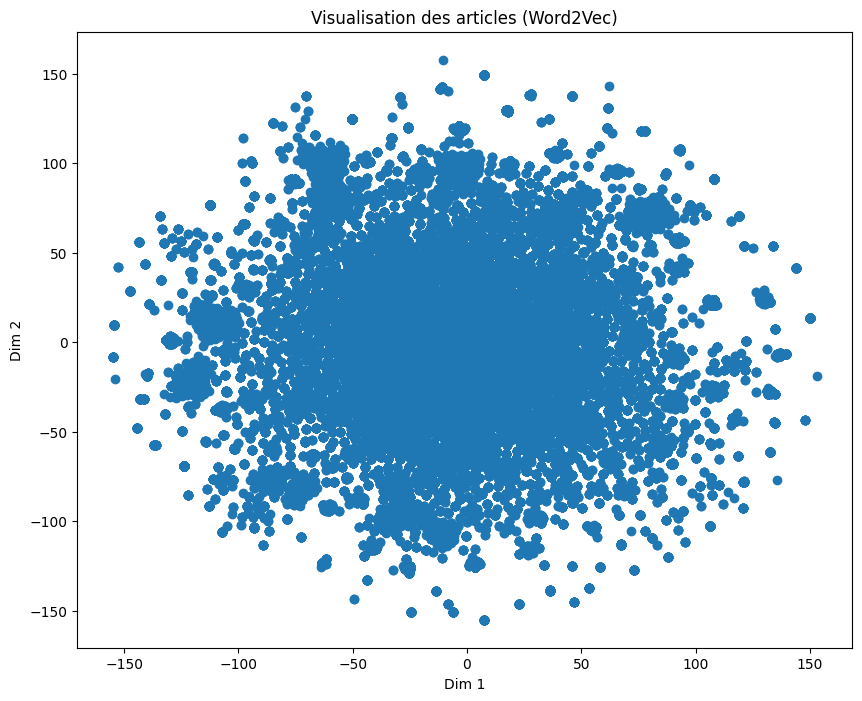

In [350]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title("Visualisation des articles (Word2Vec)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

In [351]:
def bias_score(article_tokens, model, target_words=("palestinian", "israel")):
    vec_article = article_vector(article_tokens, model)
    if vec_article is None:
        return None

    scores = {}
    for word in target_words:
        if word in model.wv:
            scores[word] = np.dot(vec_article, model.wv[word]) / (
                np.linalg.norm(vec_article) * np.linalg.norm(model.wv[word])
            )
        else:
            scores[word] = None
    return scores

In [352]:
print(bias_score(tokenized_corpus[11], w2v_model))

{'palestinian': 0.0640898, 'israel': -0.052346736}


In [353]:
vec = article_vector(tokenized_corpus[11], w2v_model)
print(np.dot(vec, vec) / (np.linalg.norm(vec) * np.linalg.norm(vec)))

1.0


In [354]:
def plot_embeddings(model, words):
    #vecteurs
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:  #verifier que le mot est dans le vocabulaire
            tokens.append(model.wv[word])
            labels.append(word)

    tokens = np.array(tokens)

   
    tsne = TSNE(
        n_components=3,       
        perplexity=10,         
        random_state=42
    )
    new_values = tsne.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(
            labels[i],
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom'
        )
    plt.title("Visualisation t-SNE des embeddings")
   


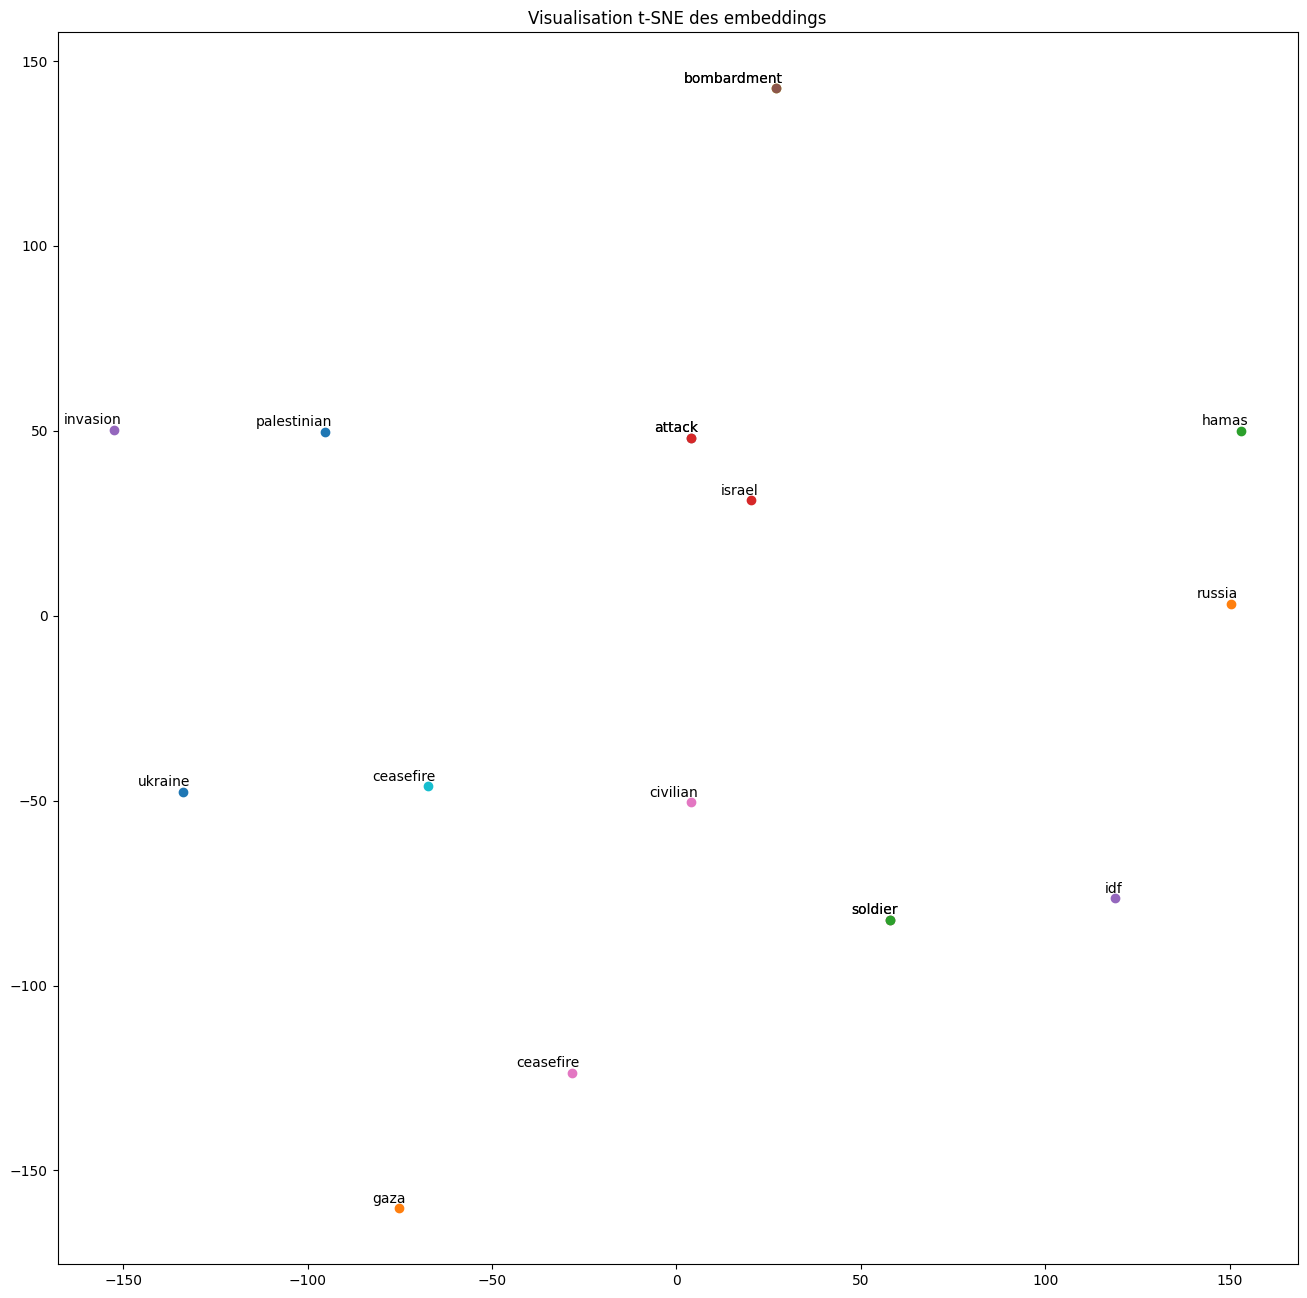

In [355]:
#israel / palestine +ukraine
pal_words = [
    'palestinian', 'gaza', 'hamas', 'israel', 'idf', 'soldier',
    'civilian', 'attack', 'bombardment', 'ceasefire','ukraine', 'russia', 'russian', 'kyiv', 'moscow',
    'soldier', 'attack', 'invasion', 'bombardment', 'ceasefire'
]


#visualisation embeddings 
plot_embeddings(w2v_model, pal_words)
plt.savefig("results/embeddings_dual.png", dpi=300, bbox_inches="tight")
plt.show()



In [356]:
print(bias_score(["aaaaaa", "bbbbbb"], w2v_model))

None


In [357]:
test_pal = simple_preprocess("new york time title israel take journalist combat zone gaza")
test_isr = simple_preprocess("update date conflict israel hamas war article israel colonel projected confidence described battle")

print(bias_score(test_pal, w2v_model))
print(bias_score(test_isr, w2v_model))

#sauvegarde
with open("results/bias_score_tests.txt", "w", encoding="utf-8") as f:
    f.write("Test Palestine-like text:\n")
    f.write(f"Tokens: {test_pal}\n")
    f.write(f"Bias score: {bias_score(test_pal, w2v_model)}\n\n")

    f.write("Test Israel-like text:\n")
    f.write(f"Tokens: {test_isr}\n")
    f.write(f"Bias score: {bias_score(test_isr, w2v_model)}\n")

{'palestinian': 0.021240376, 'israel': 0.42739284}
{'palestinian': 0.12093836, 'israel': 0.5623063}


In [358]:
def plot_embeddings(model, words):
    #vecteurs
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:  #verifier que le mot est dans le vocabulaire
            tokens.append(model.wv[word])
            labels.append(word)

    tokens = np.array(tokens)

   
    tsne = TSNE(
        n_components=3,       
        perplexity=5,         
        random_state=42
    )
    new_values = tsne.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(
            labels[i],
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom'
        )
    plt.title("Visualisation t-SNE des embeddings")
   


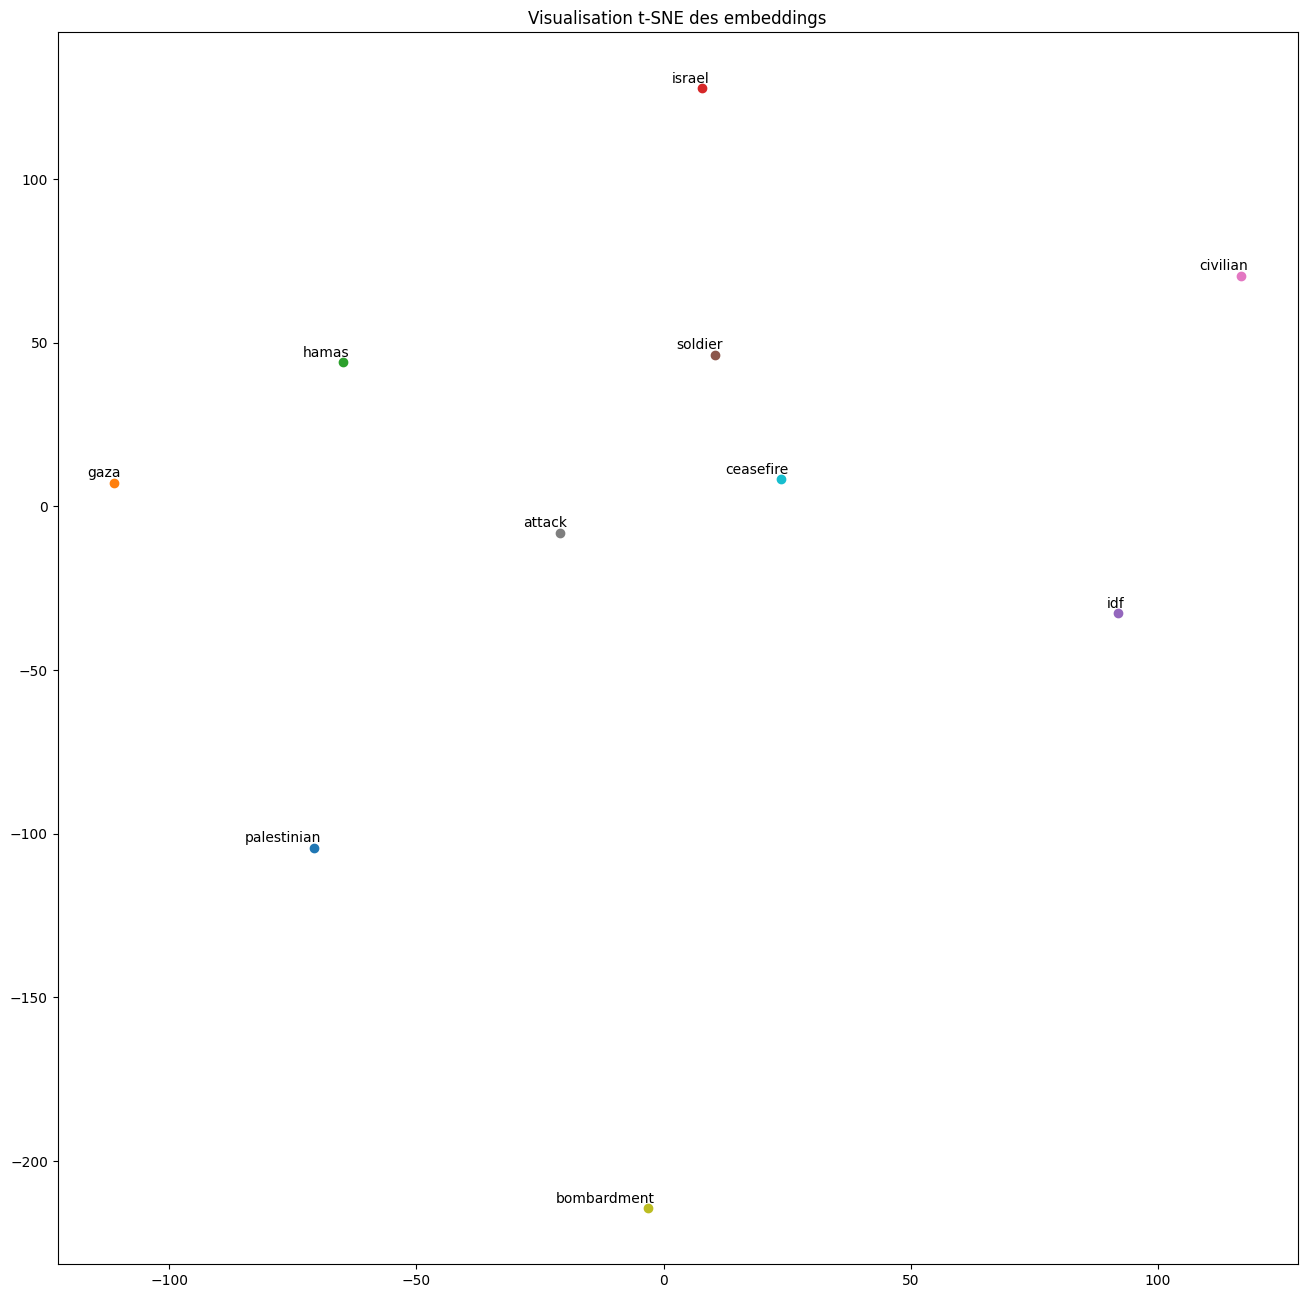

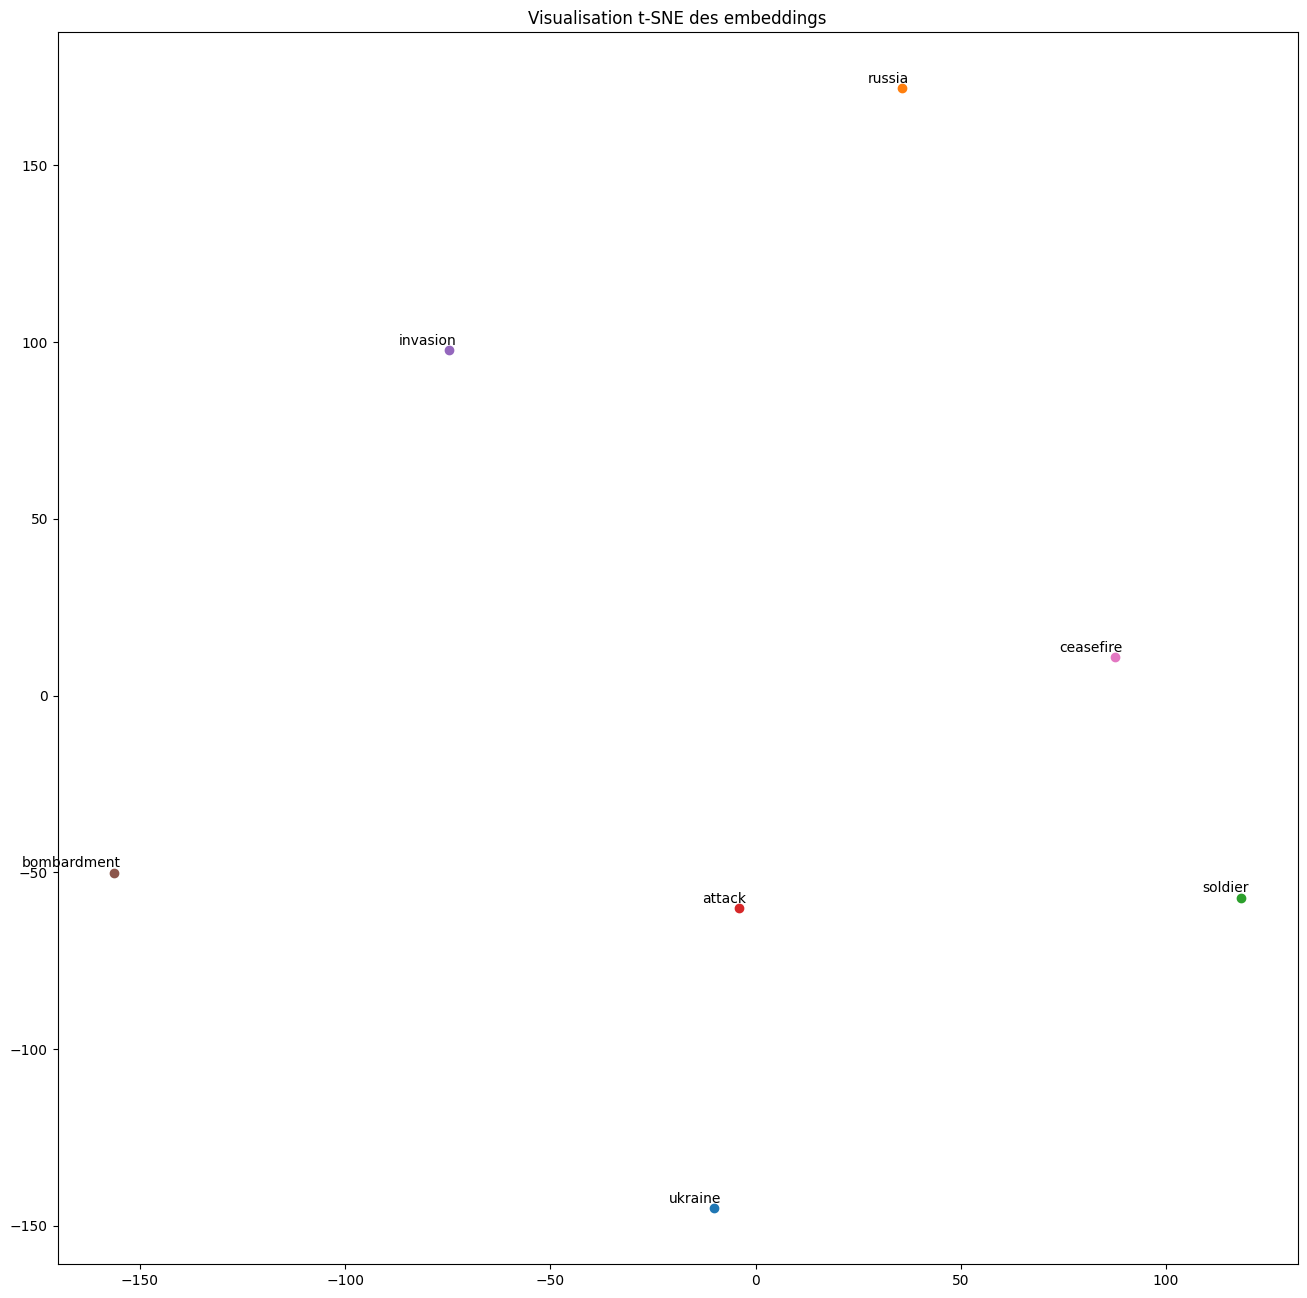

In [359]:

pal_isr_words = [
    'palestinian', 'gaza', 'hamas', 'israel', 'idf', 'soldier',
    'civilian', 'attack', 'bombardment', 'ceasefire'
]


ukr_rus_words = [
    'ukraine', 'russia', 'russian', 'kyiv', 'moscow',
    'soldier', 'attack', 'invasion', 'bombardment', 'ceasefire'
]


plot_embeddings(w2v_model, pal_isr_words)
plt.savefig("results/embeddings_gaza.png", dpi=300, bbox_inches="tight")
plt.show()
plot_embeddings(w2v_model, ukr_rus_words)
plt.savefig("results/embeddings_ukraine.png", dpi=300, bbox_inches="tight")
plt.show()

